# **QUESTION ONE**

The dataset provided shows the annual salary information of an organisation for employees paid in calendar year 2023. This dataset is a prime candidate for conducting analyses on salary disparities, the distribution of salaries across gender and grade levels, and other business intelligence aspects.

1. **Gender Pay Gap Analysis**: Using suitable visuals, run a “Gender Pay Gap Analysis” to examine the salary differences between genders within similar ‘Divisions’, ‘Grades’ and ‘Departments’ to identify any disparities that need to be addressed in the organisation. [20 Marks]

2. **Distribution of Salaries**: Analyse the distribution of salaries across different ‘Departments’ and ‘Divisions’ to understand how compensation varies within the organisation. [10 Marks]

3. **Impact of Overtime and Longevity Pay**: Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees (i.e. ‘Base_Salary’) and explain the trends or patterns in these payments. [10 Marks]


In [13]:
# import dataset
import pandas as pd #import and transform-data import seaborn as sn #Generates visuals
import seaborn as sn
import numpy as np #structuring data
import matplotlib as mat #Generates visuals
data2 = pd.read_csv('Question1.csv')

In [14]:
data2

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


In [15]:
data2.duplicated().sum()

617

In [16]:
data1=data2.drop_duplicates()
data1.duplicated().sum()

0

In [17]:
data1.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              25
dtype: int64

In [18]:
#data= data1.fillna(method='backfill')
data = data1.fillna(data1.mode().iloc[0])

In [19]:
#drop missing values
#data = data1.dropna()
data.isnull().sum()

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

In [20]:
data.nunique()

Department           42
Department_Name      42
Division            627
Gender                2
Base_Salary        3470
Overtime_Pay       5566
Longevity_Pay      1113
Grade                98
dtype: int64

In [21]:
# Display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Department':
['ABS' 'BOA' 'BOE' 'CAT' 'CCL' 'CEC' 'CEX' 'COR' 'CUS' 'DEP' 'DGS' 'DHS'
 'DOT' 'DPS' 'ECM' 'FIN' 'FRS' 'HCA' 'HHS' 'HRC' 'IGR' 'LIB' 'MPB' 'NDA'
 'OAG' 'OAS' 'OCP' 'OFR' 'OGM' 'OHR' 'OIG' 'OLO' 'OLR' 'OMB' 'ORE' 'PIO'
 'POL' 'PRO' 'REC' 'SHF' 'TBS' 'ZAH']


Unique values in column 'Department_Name':
['Alcohol Beverage Services' 'Board of Appeals Department'
 'Board of Elections' "County Attorney's Office" 'County Council'
 'Community Engagement Cluster' 'Offices of the County Executive'
 'Correction and Rehabilitation' 'Community Use of Public Facilities'
 'Department of Environmental Protection' 'Department of General Services'
 'Office of Emergency Management and Homeland Security'
 'Department of Transportation' 'Department of Permitting Services'
 'Ethics Commission' 'Department of Finance' 'Fire and Rescue Services'
 'Department of Housing and Community Affairs'
 'Department of Health and Human Services' 'Office of Human Rights'
 'Office of I

In [22]:
data.describe()

,Base_Salary,Overtime_Pay,Longevity_Pay
count,9674.000000,9674.000000,9674.000000
mean,90725.643578,8594.192753,1573.027926
std,30774.245561,16879.186881,3256.385047
min,11147.240000,0.000000,0.000000
25%,71147.363700,0.000000,0.000000
50%,87328.000000,518.325000,0.000000
75%,108084.000000,10237.242500,1334.992500
max,292000.000000,227428.990000,20279.460000


In [23]:
# Calculate descriptive statistics
desc = data.describe()

# Calculate mode
mode = data.mode().iloc[0]

# Add mode to the descriptive statistics
desc.loc['mode'] = mode

print(desc)

         Base_Salary   Overtime_Pay  Longevity_Pay
count    9674.000000    9674.000000    9674.000000
mean    90725.643578    8594.192753    1573.027926
std     30774.245561   16879.186881    3256.385047
min     11147.240000       0.000000       0.000000
25%     71147.363700       0.000000       0.000000
50%     87328.000000     518.325000       0.000000
75%    108084.000000   10237.242500    1334.992500
max    292000.000000  227428.990000   20279.460000
mode   108084.000000       0.000000       0.000000


In [24]:
# Create a new feature that combines all the salaries
data['Total_Salary'] = data['Base_Salary'] + data['Overtime_Pay'] + data['Longevity_Pay']
data['Average'] = data['Total_Salary']/3

# Display the first few rows to verify the new feature
# print(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Salary']].head())
data.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary,Average
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000,58624.333333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360,48537.786667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000,45656.666667
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694,30640.898000
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380,28553.793333


In [29]:
import matplotlib.pyplot as plt

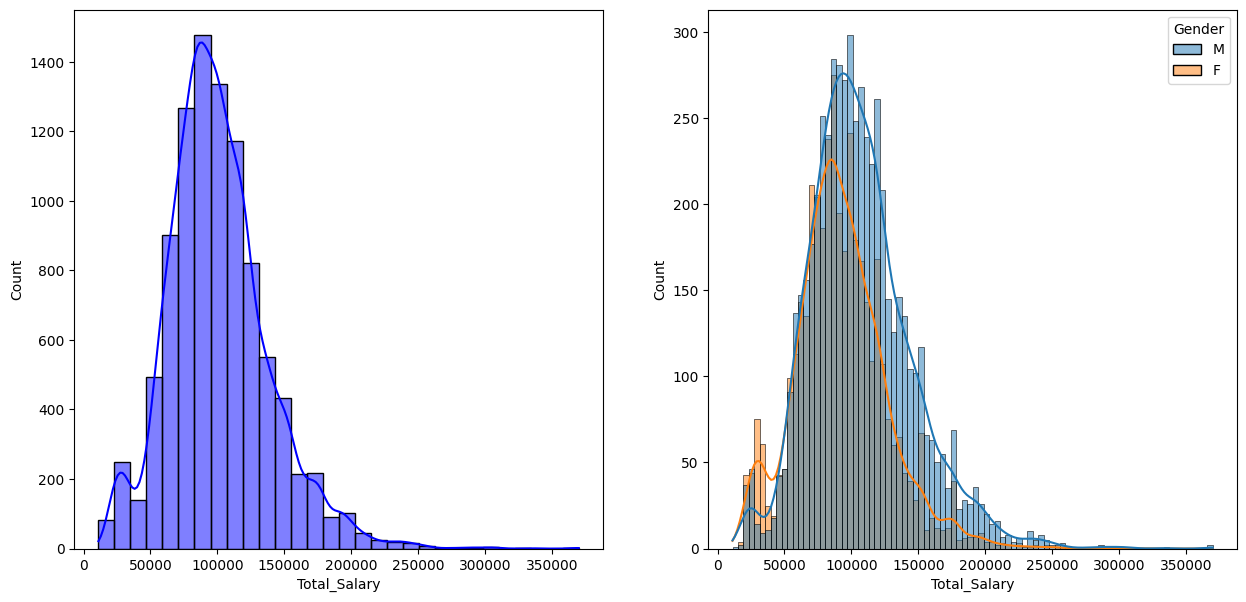

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sn.histplot(data=data, x='Total_Salary', bins=30, kde=True, color='b')
plt.subplot(122)
sn.histplot(data=data, x='Total_Salary', kde=True, hue='Gender')
plt.show()

Start with the 'Department' level as it's the broadest categorization. This will give you an initial overview of potential pay gaps.

For each department, create box plots or violin plots to compare the salary distributions of males and females. This will visually highlight any median or distributional differences.

Consider using statistical tests (t-tests, ANOVA) to determine if the observed pay gaps are statistically significant.

To make the analysis more manageable, you can focus on key divisions, grades, and departments where you suspect disparities might exist.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(122)
sn.histplot(data=data, x='Total_Salary', kde=True, hue='Department')
plt.show()

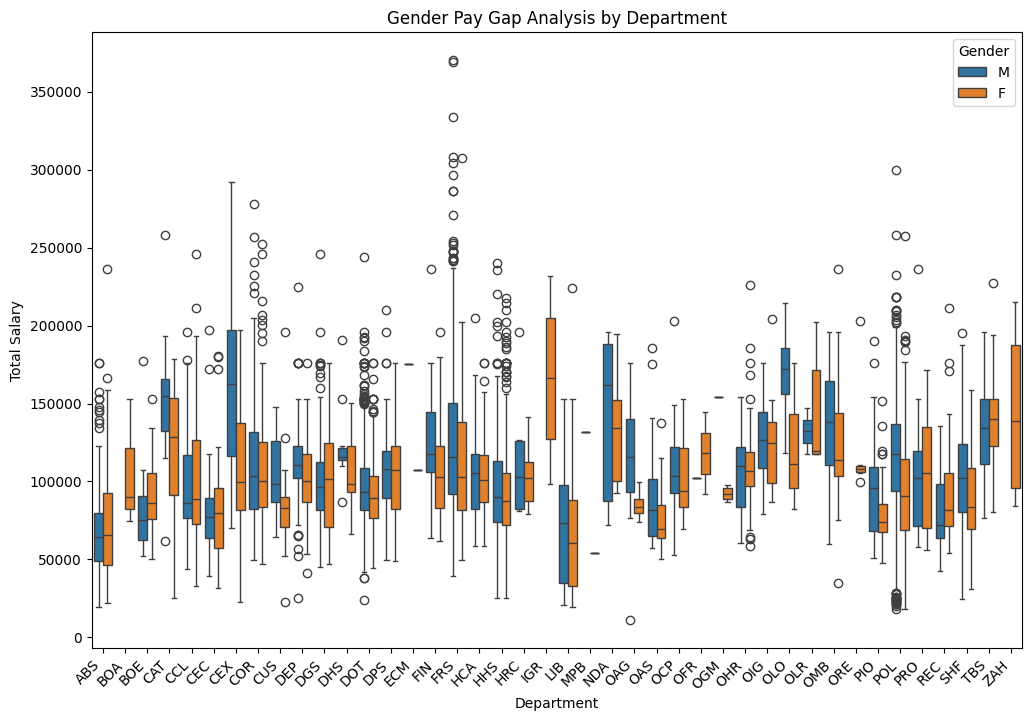

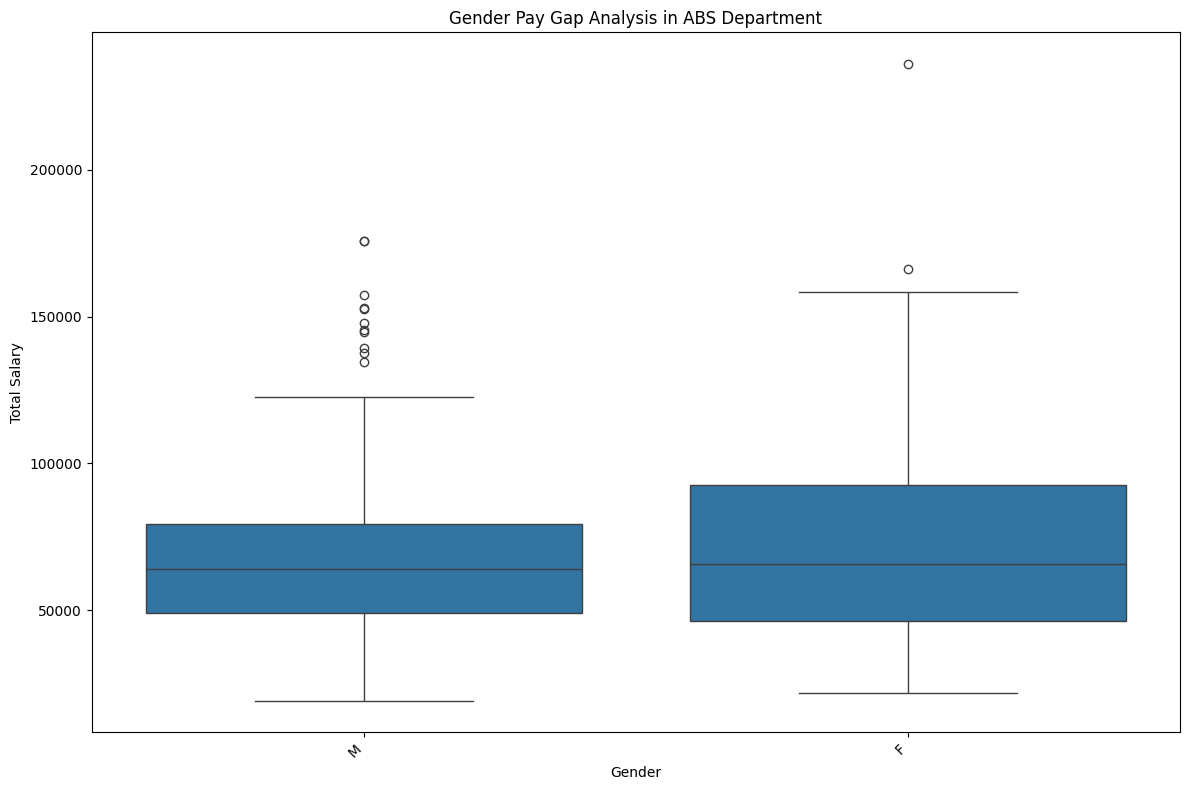

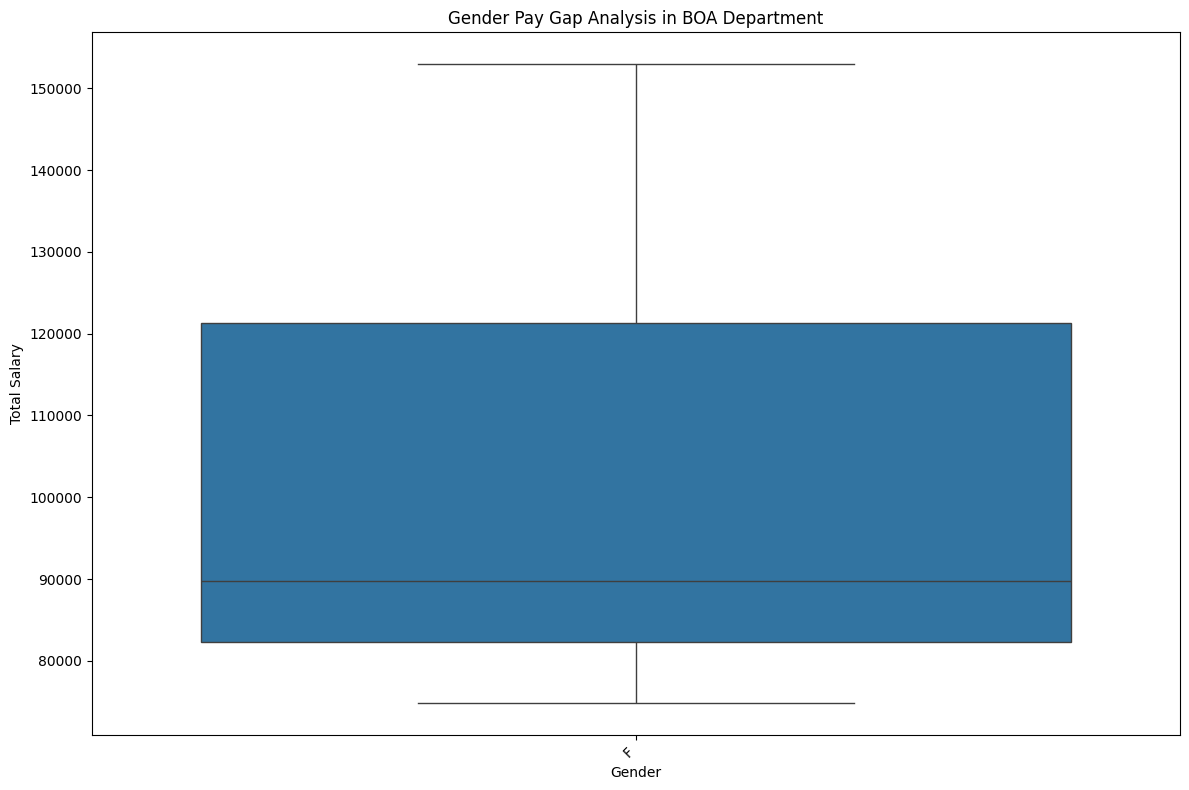

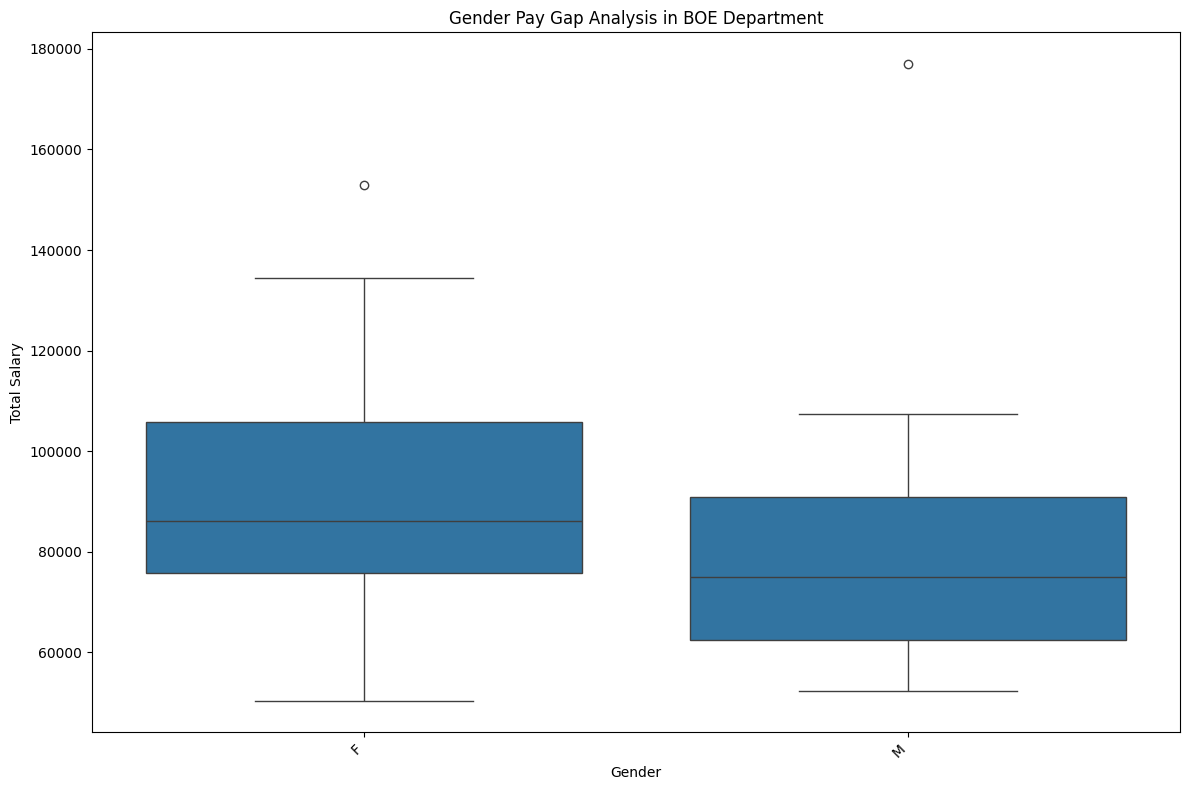

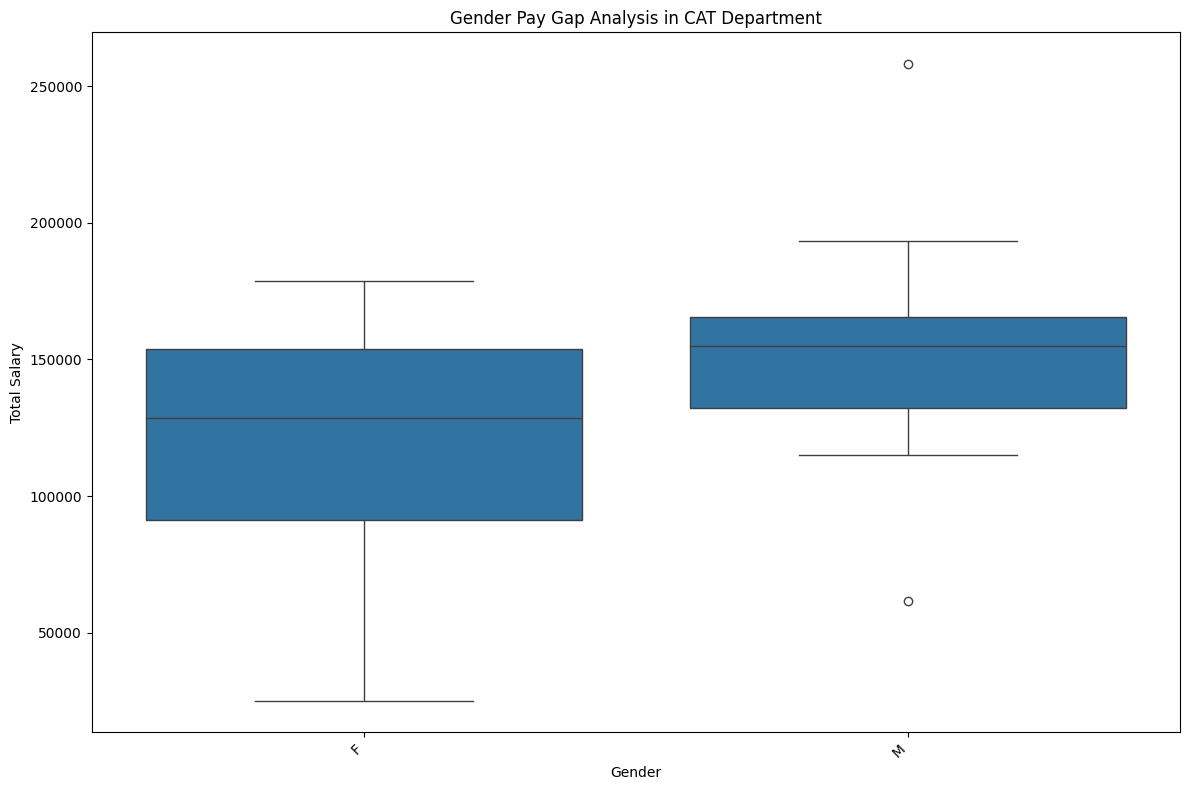

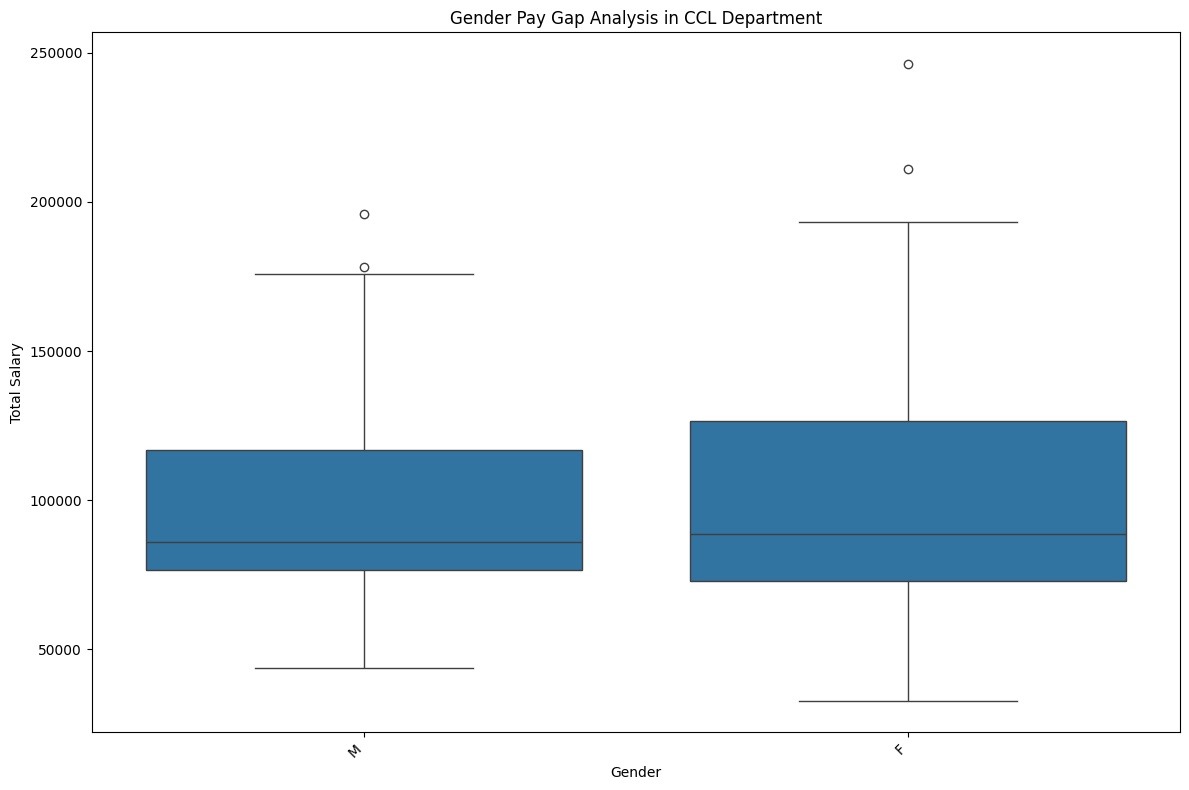

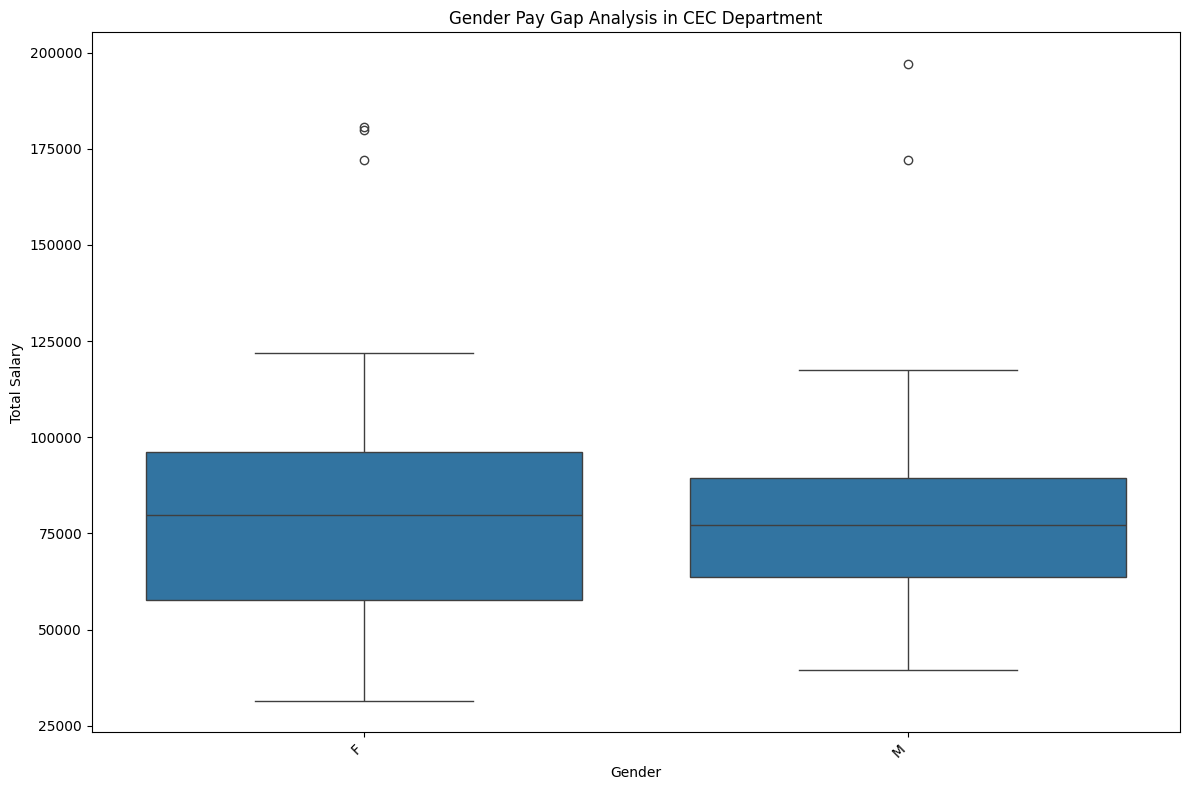

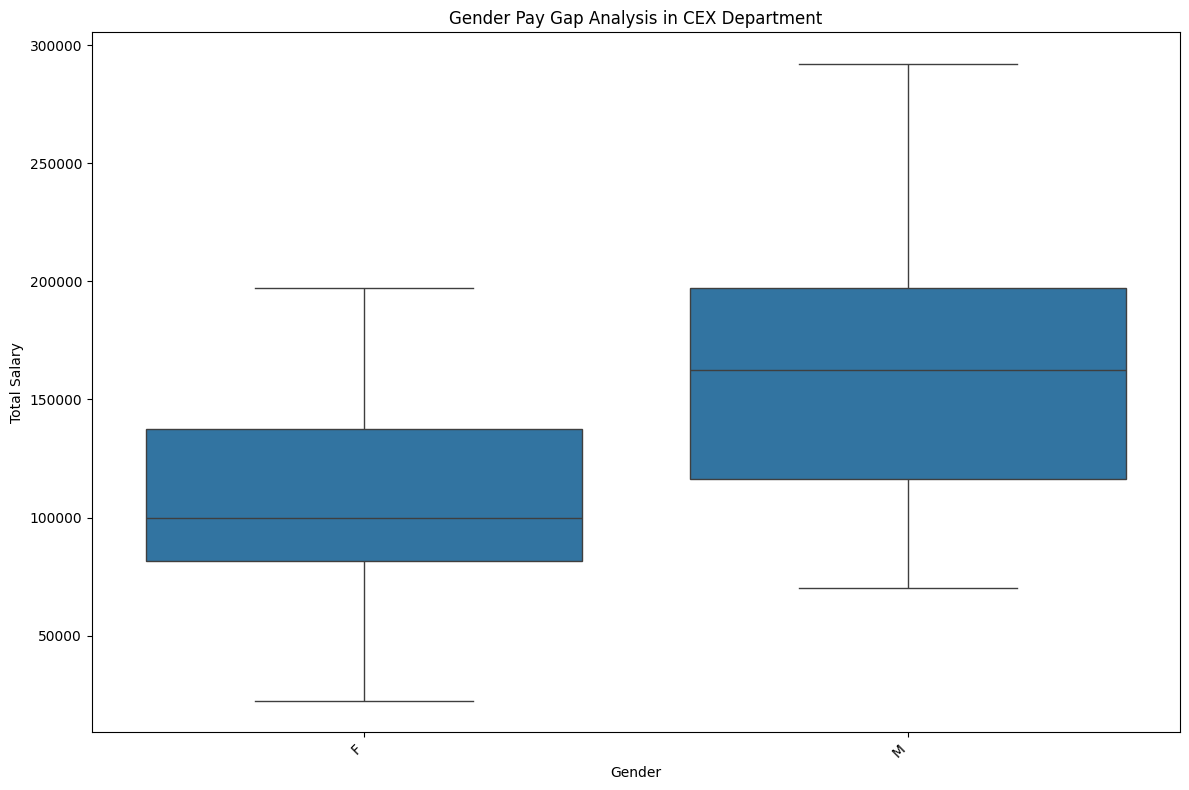

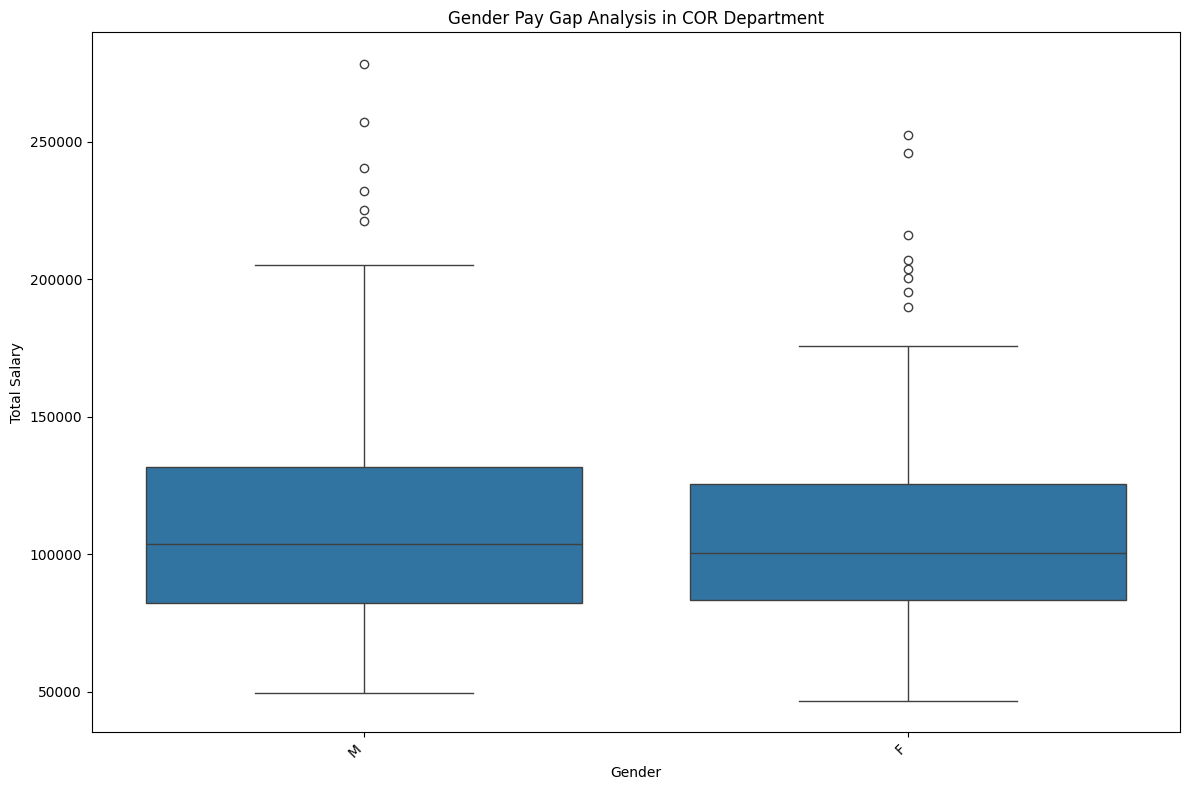

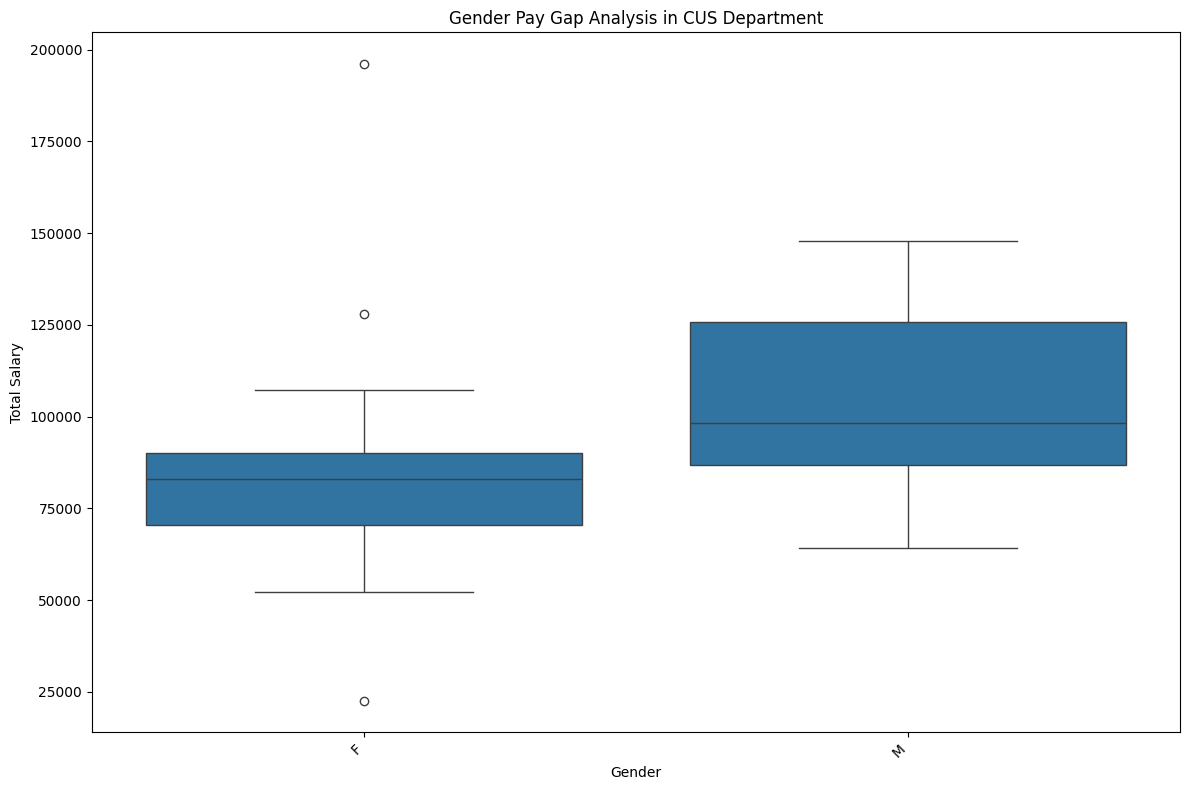

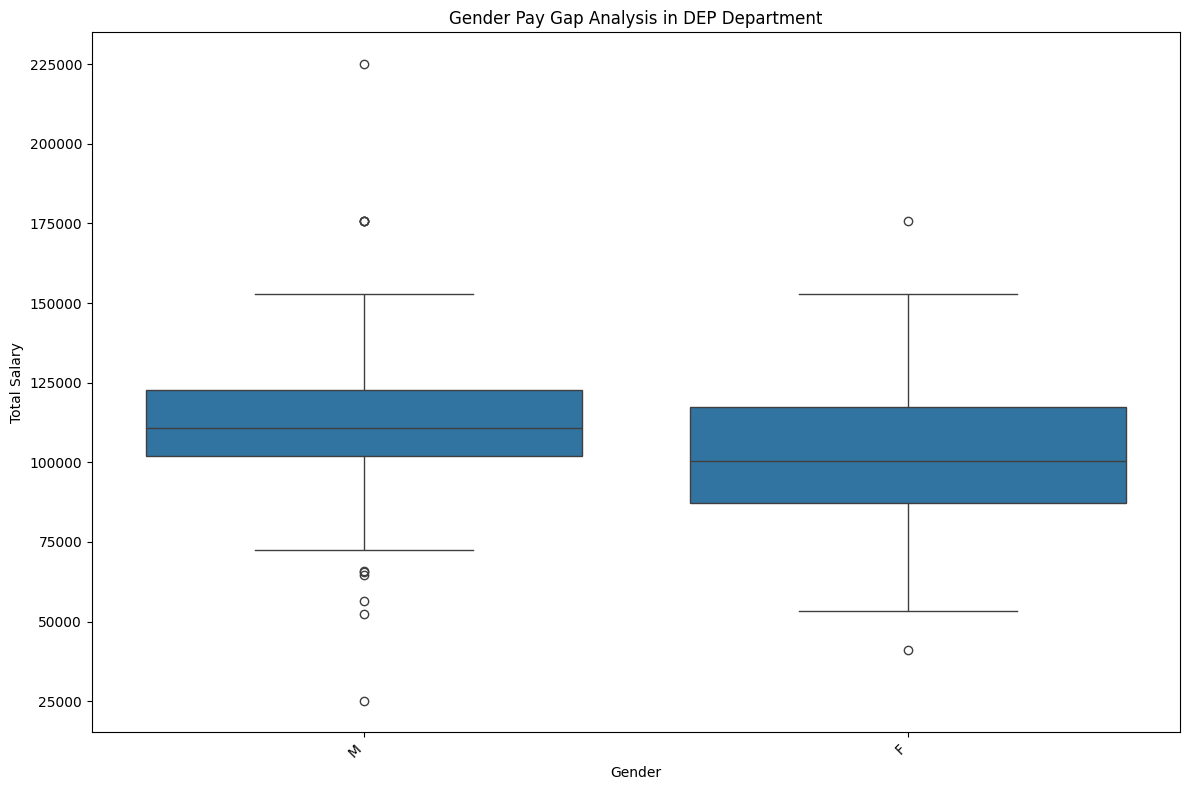

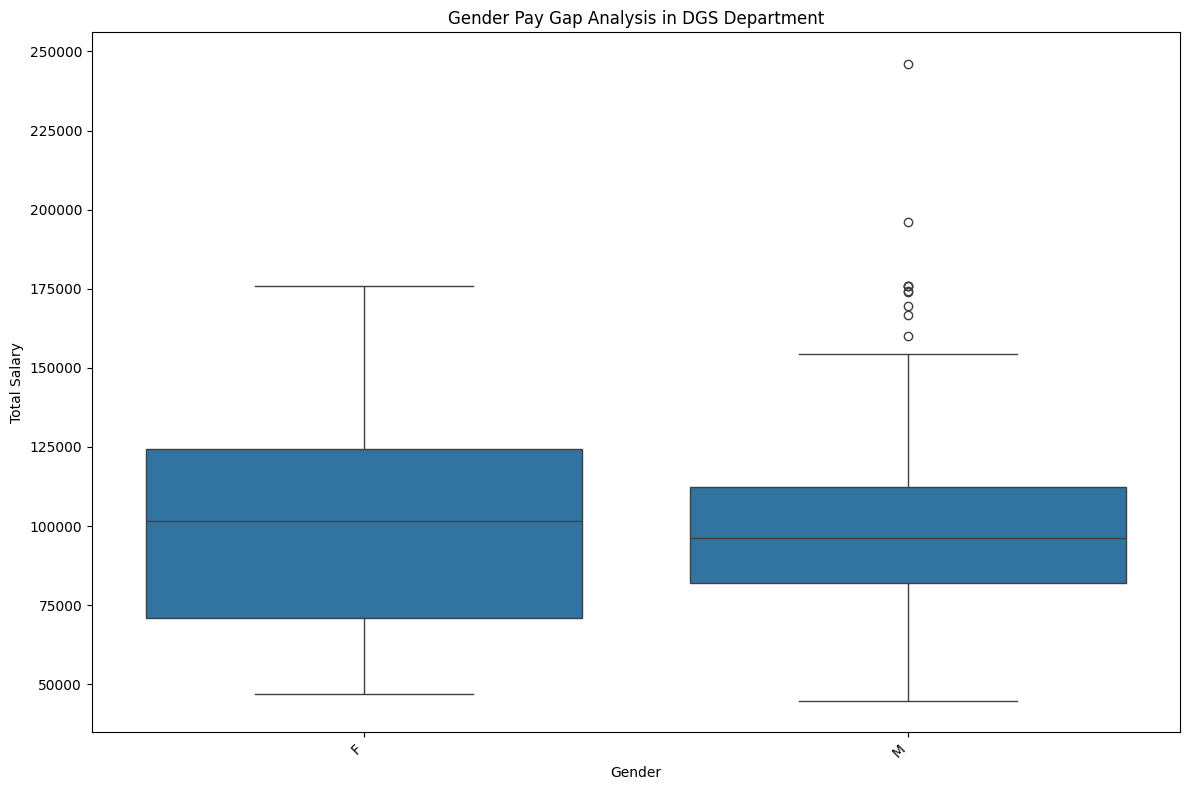

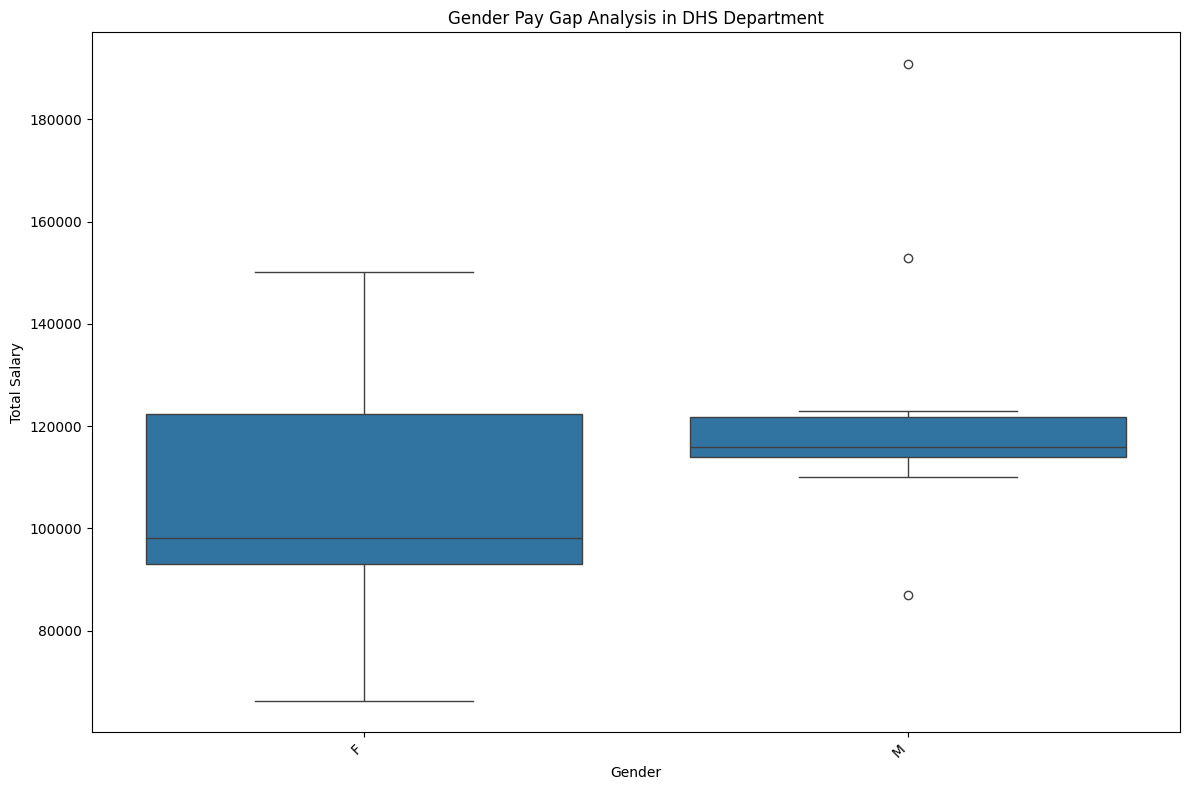

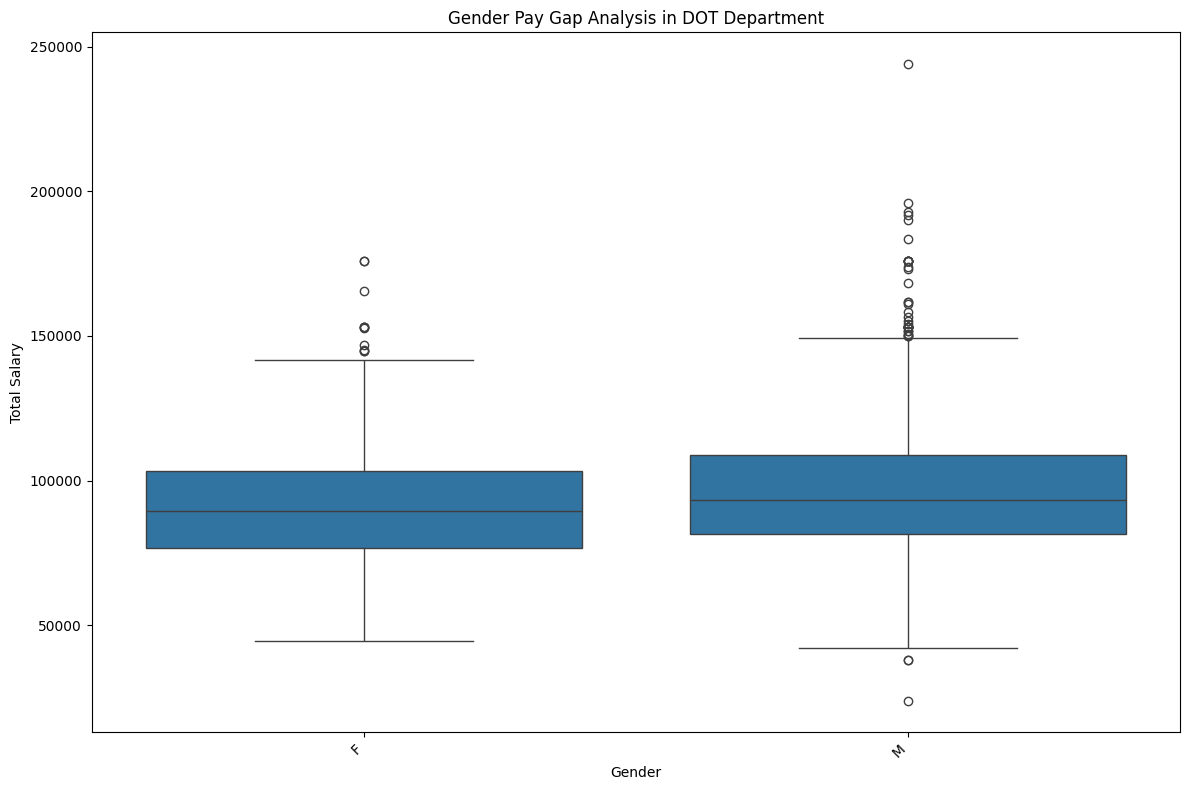

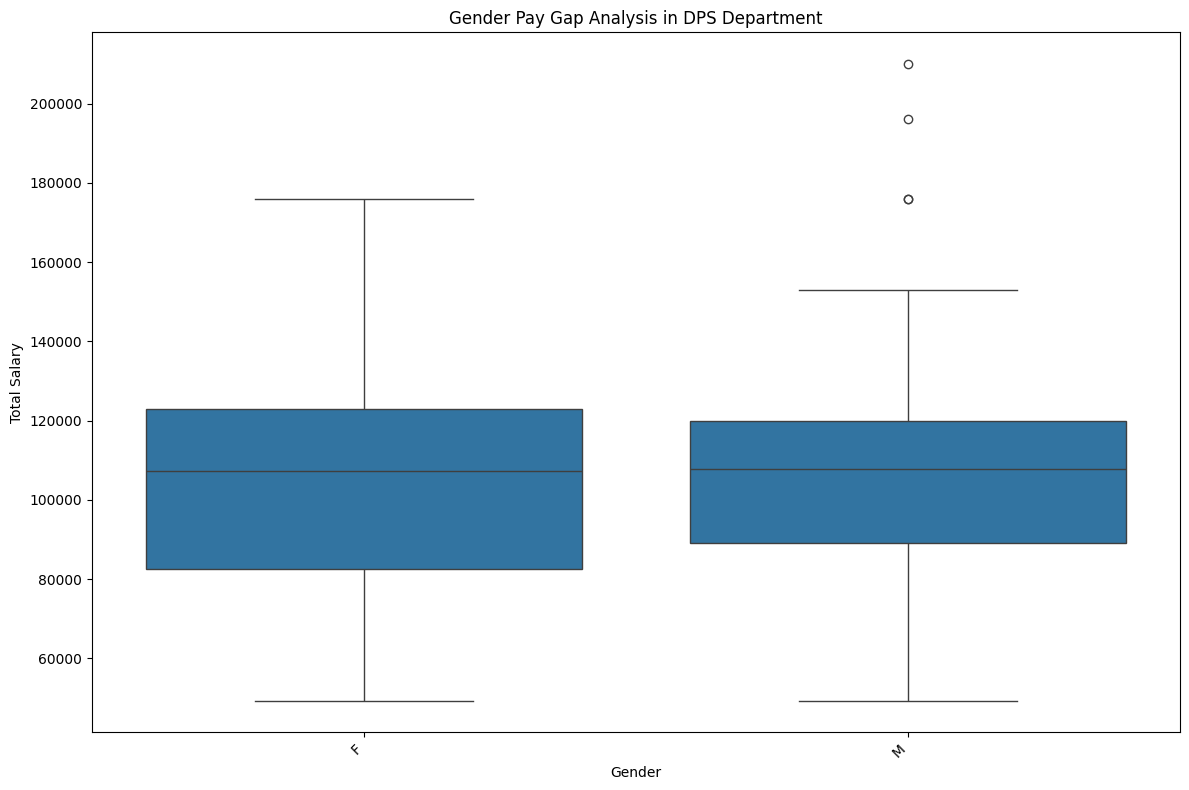

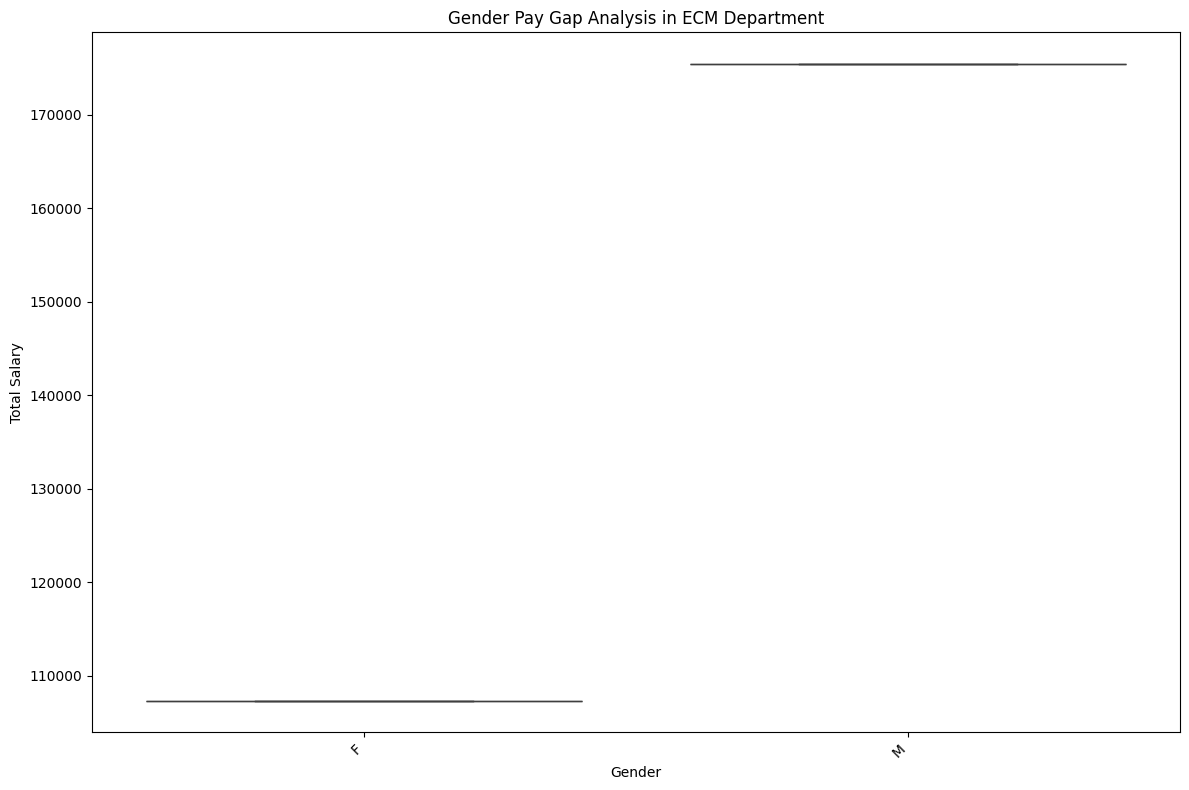

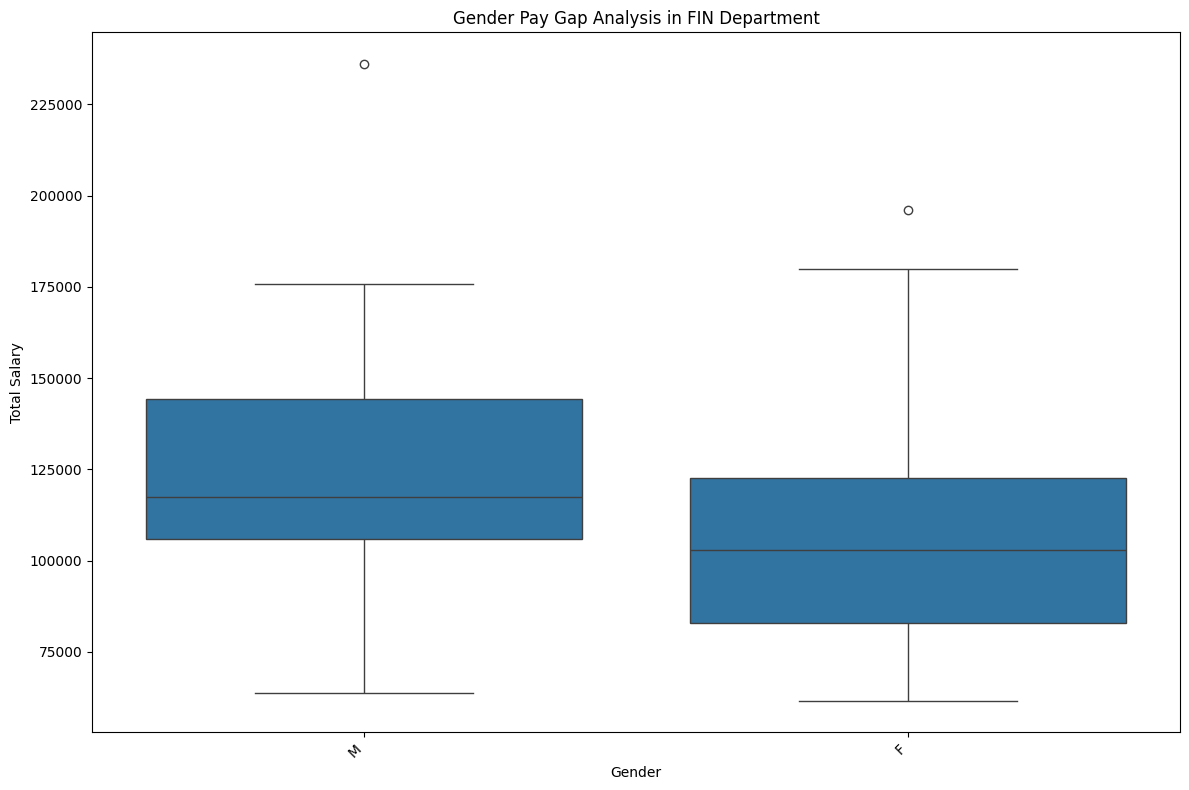

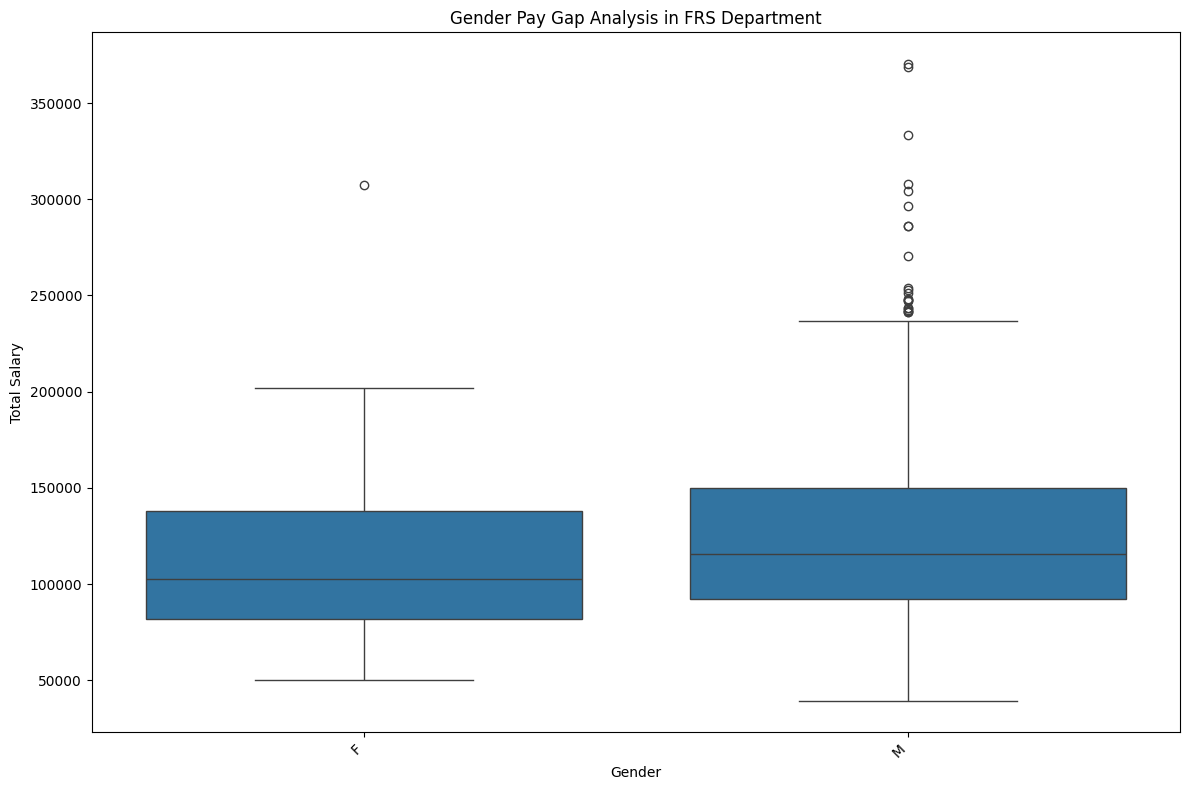

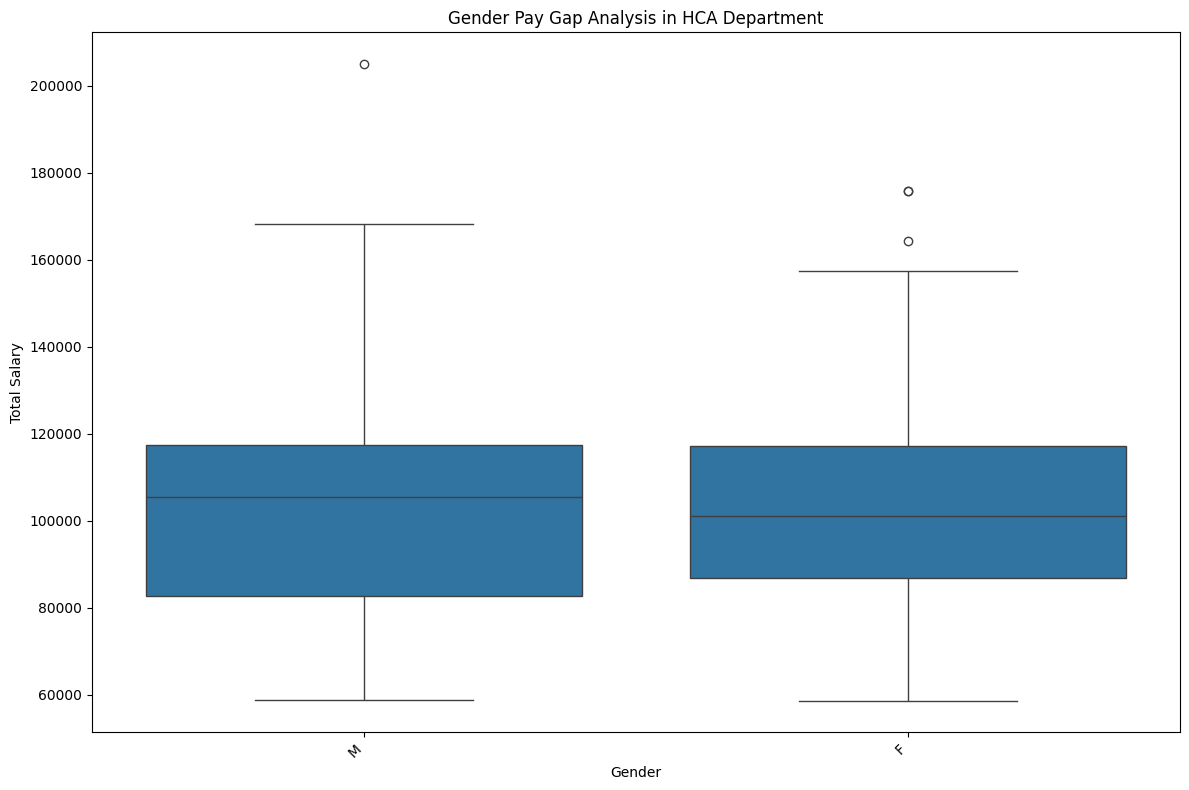

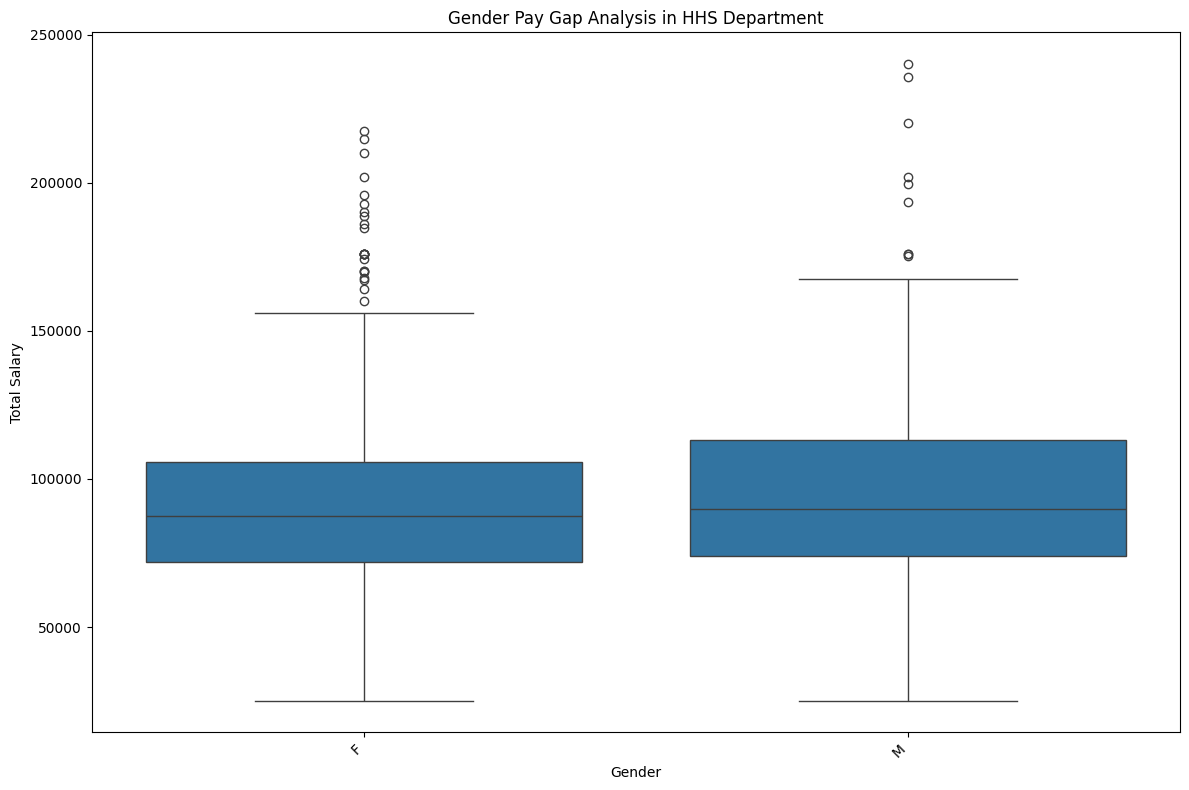

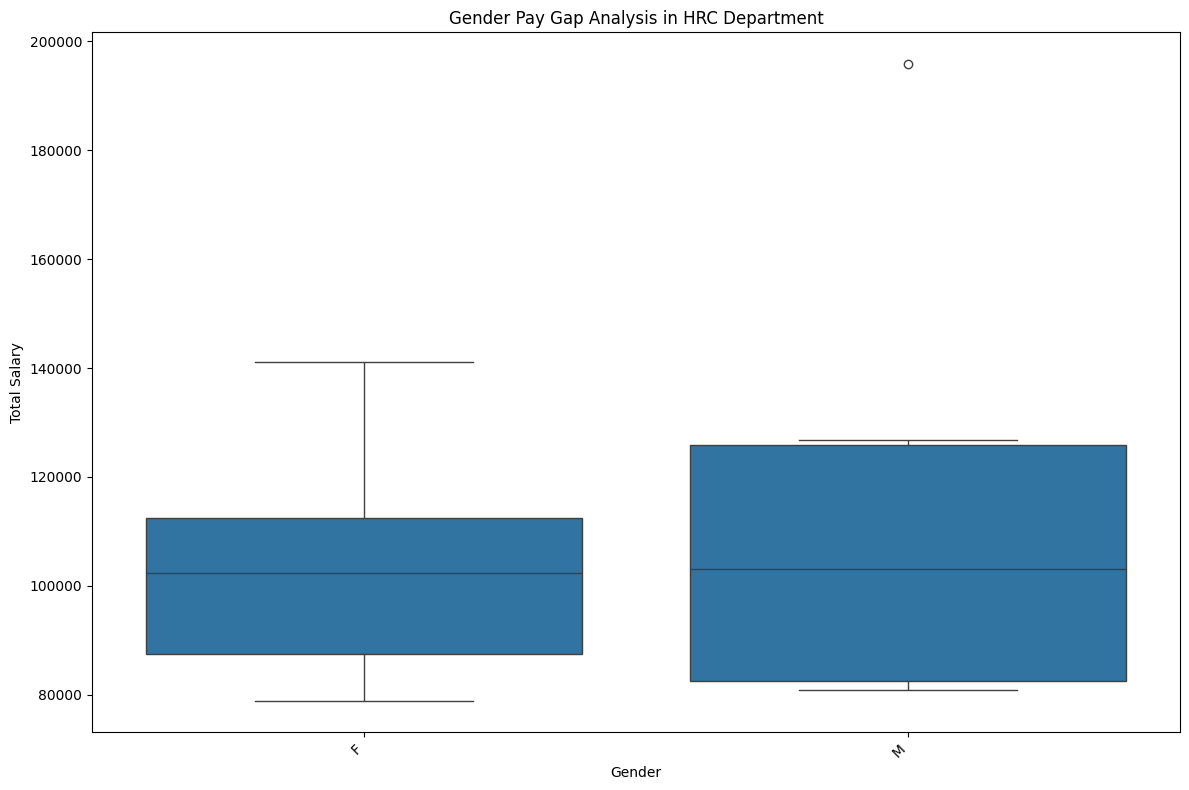

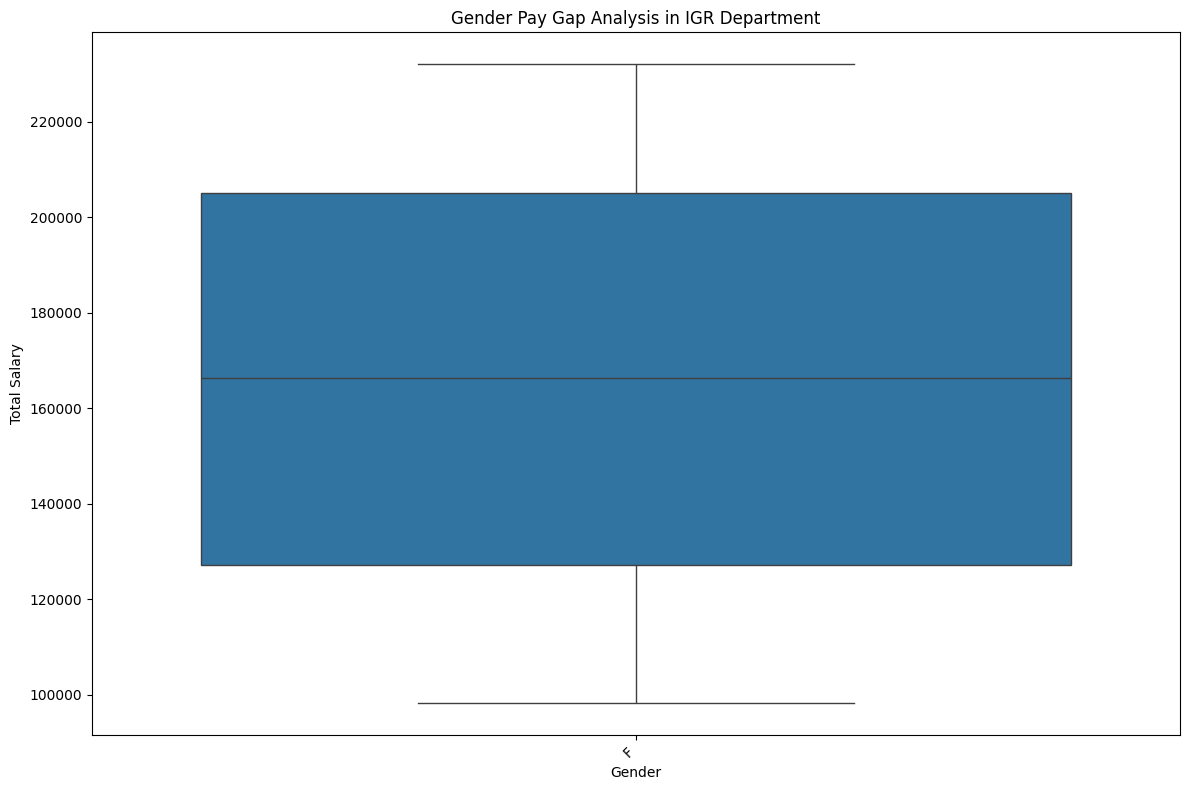

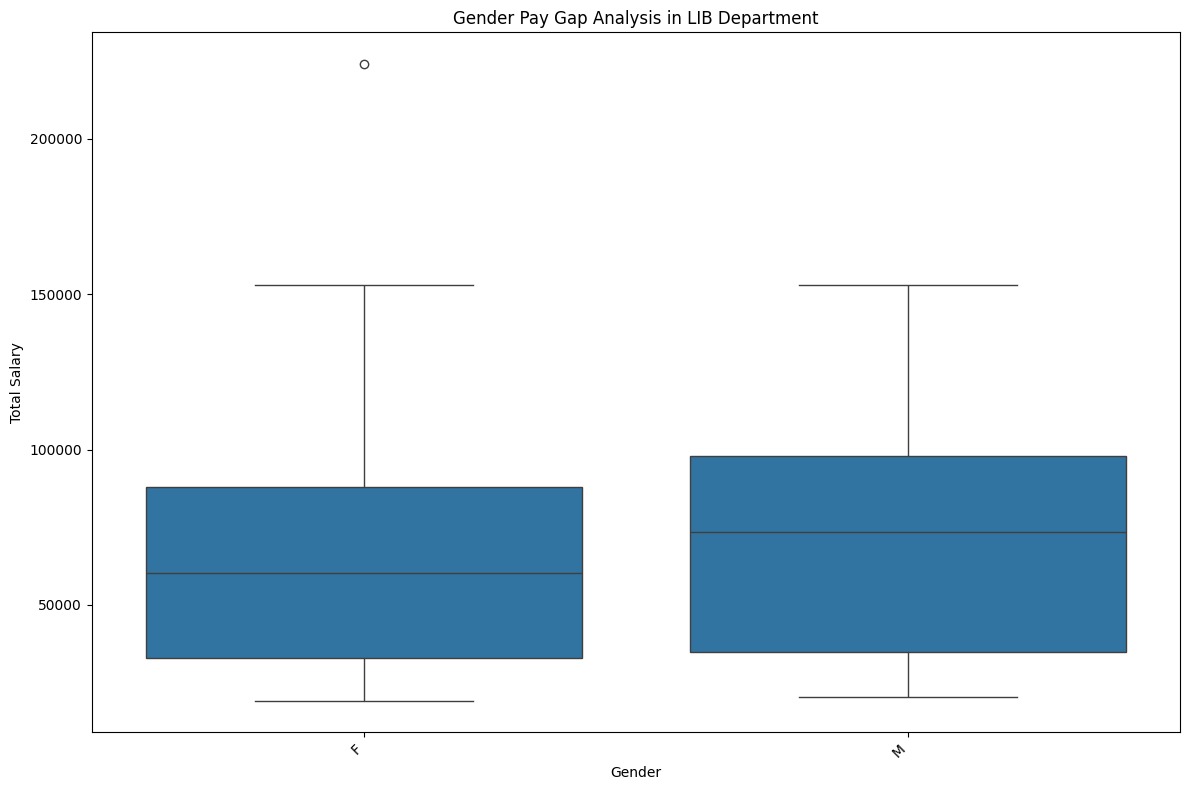

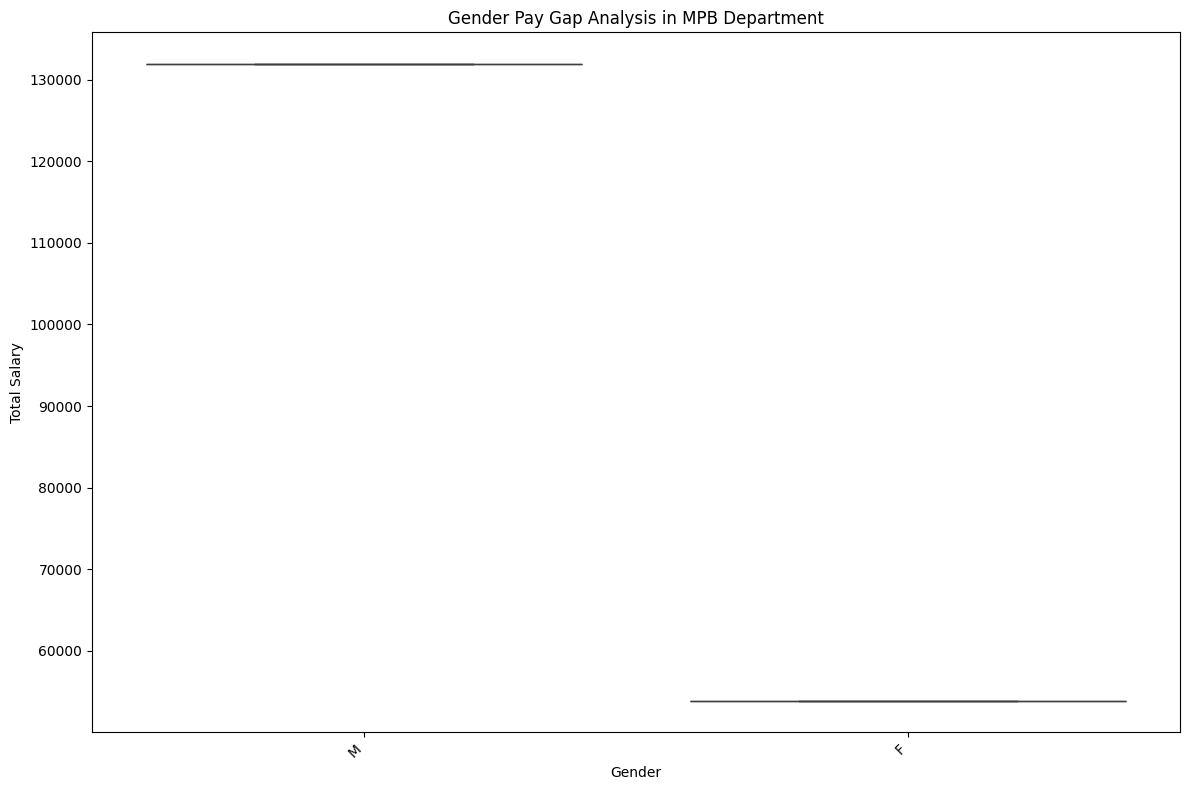

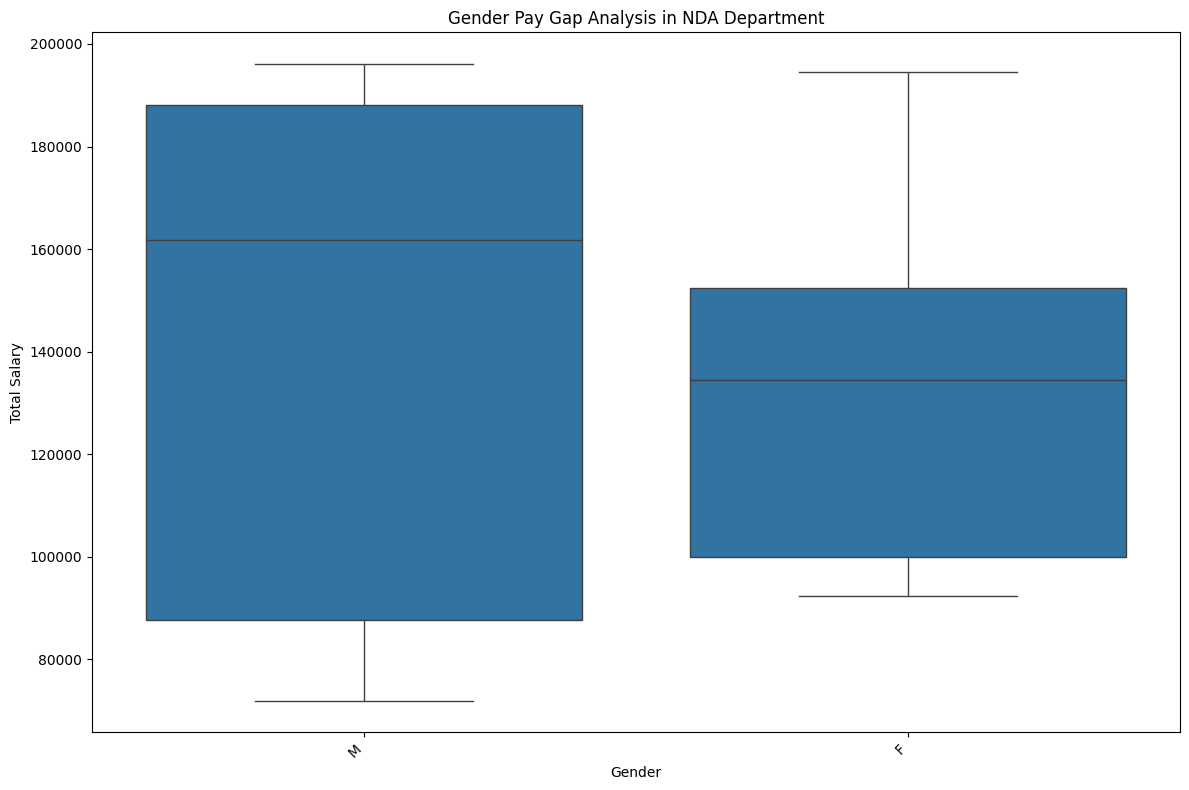

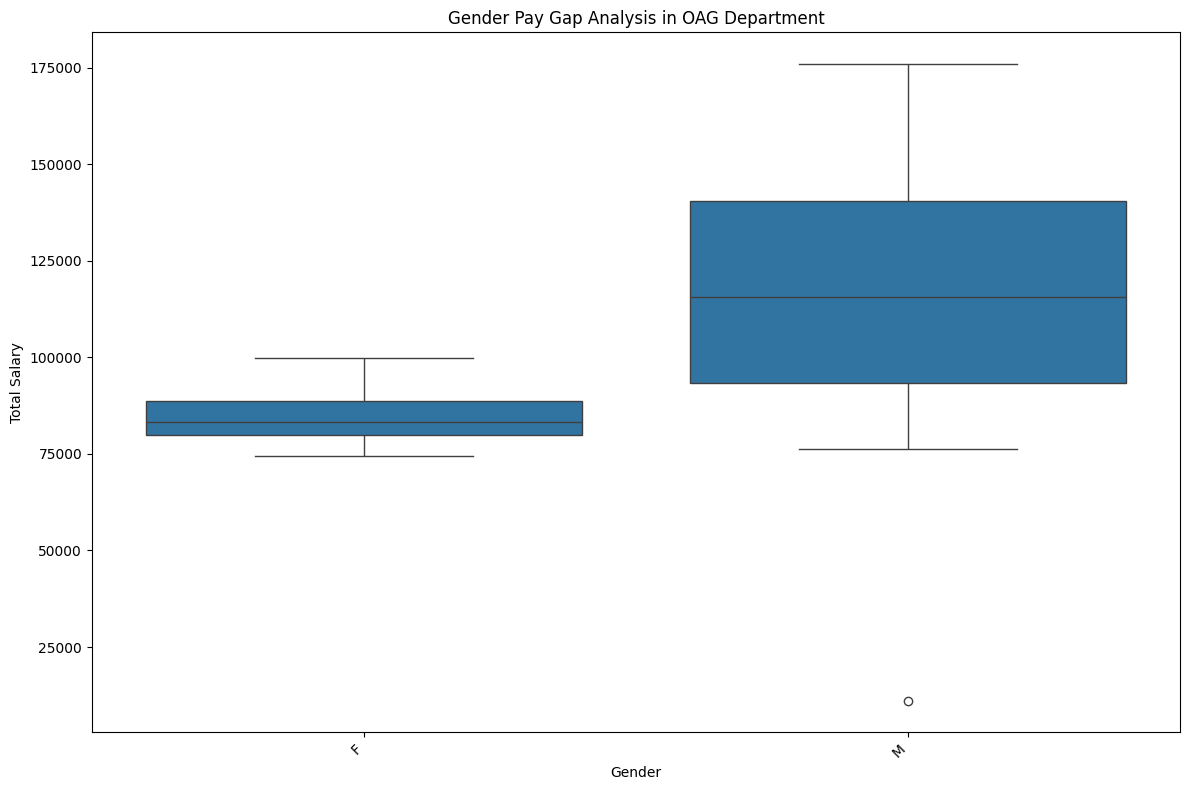

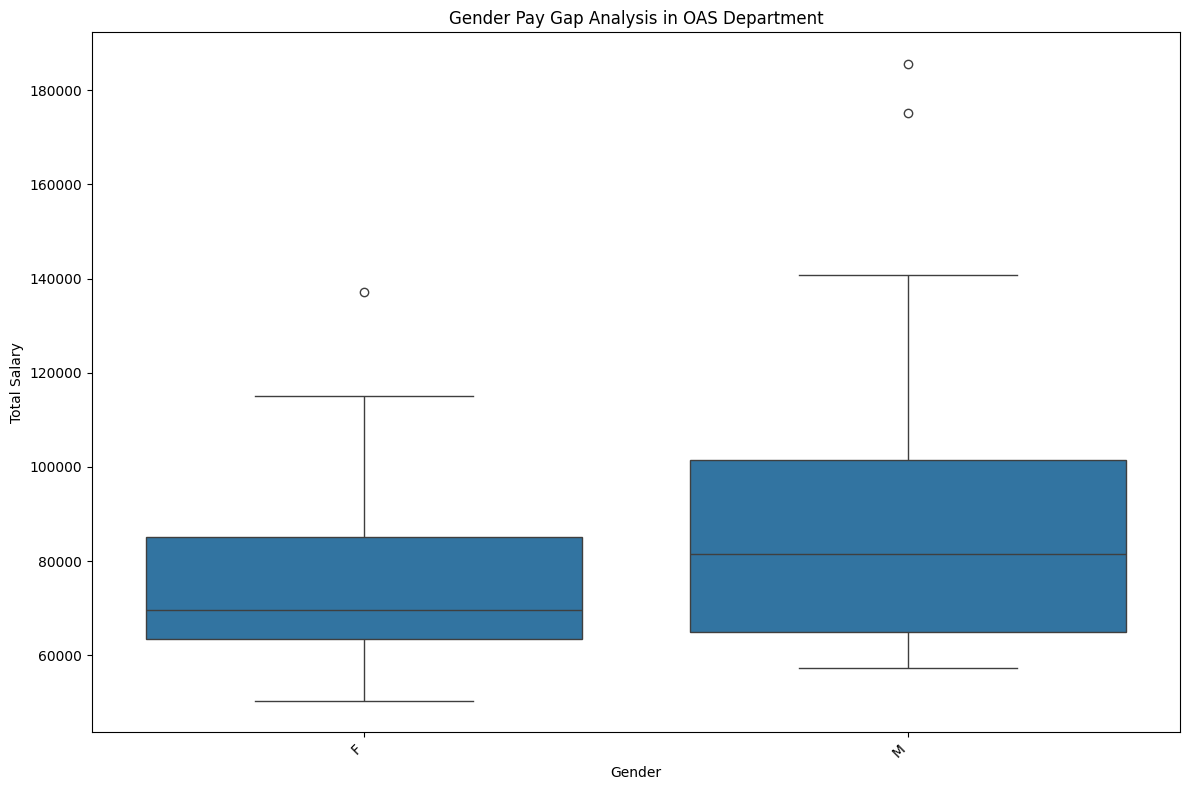

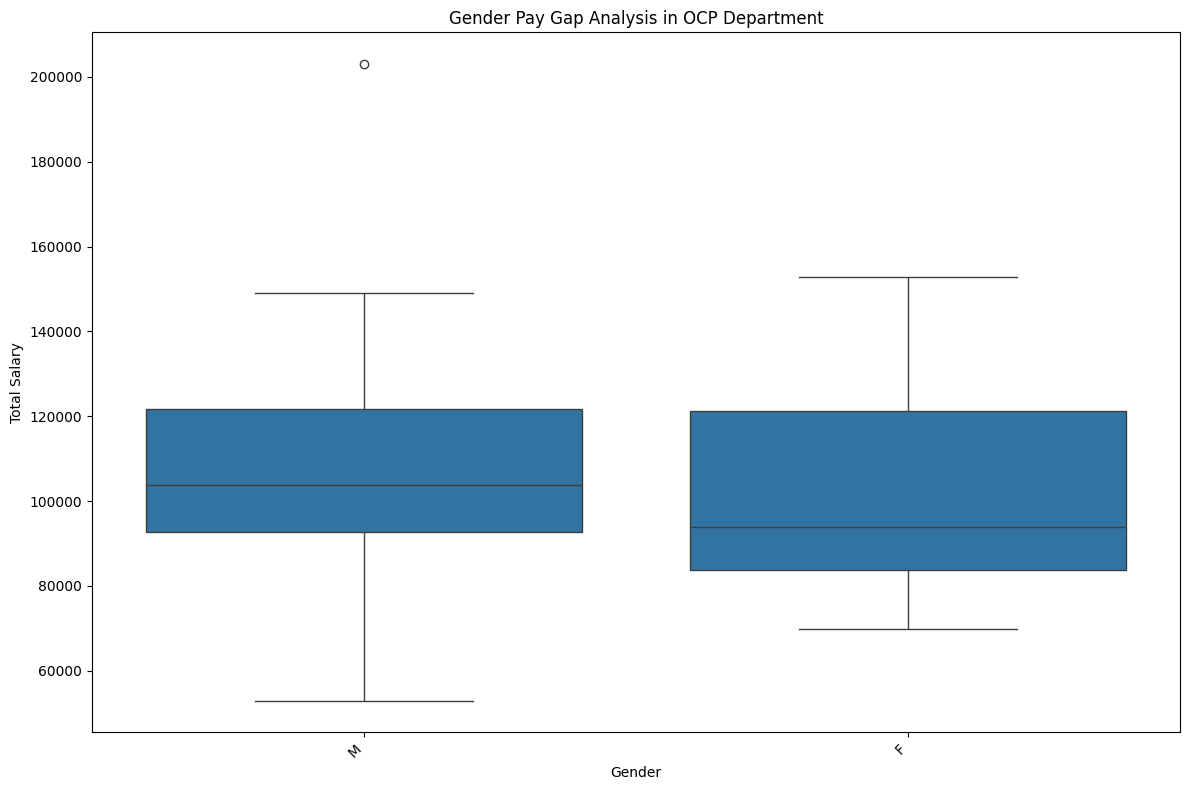

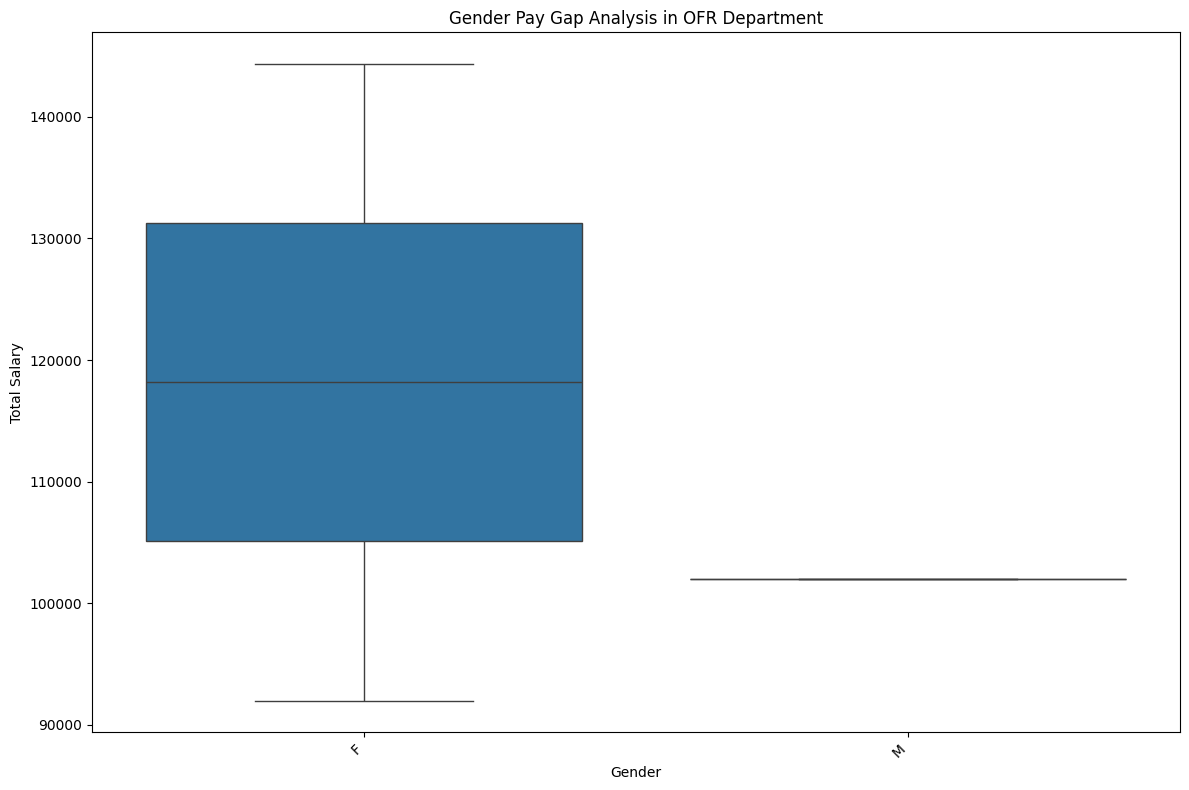

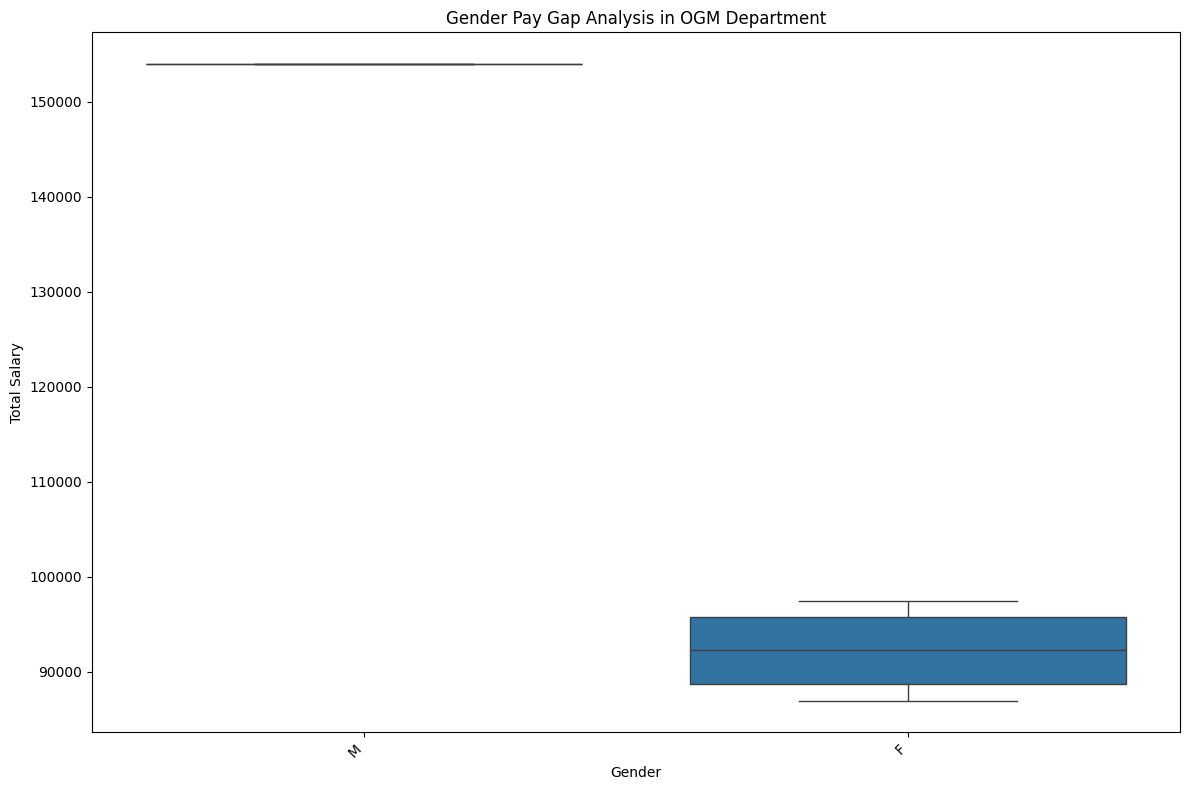

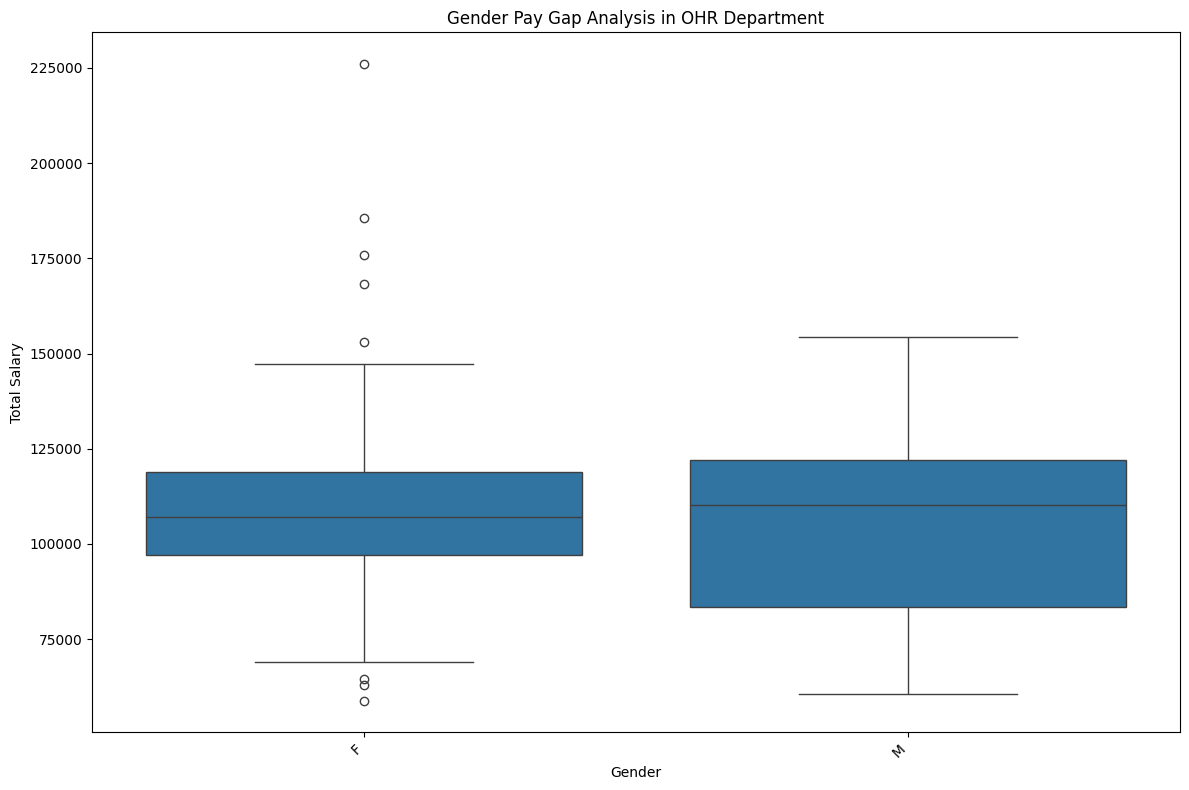

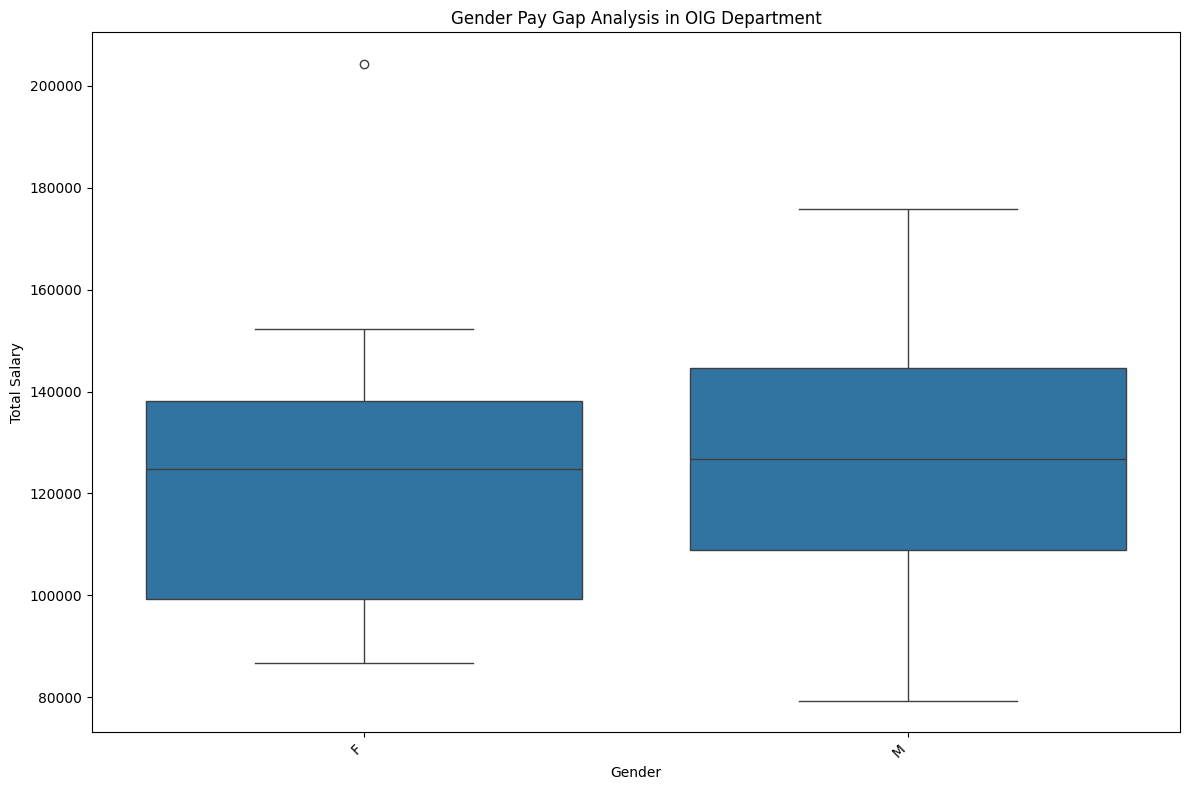

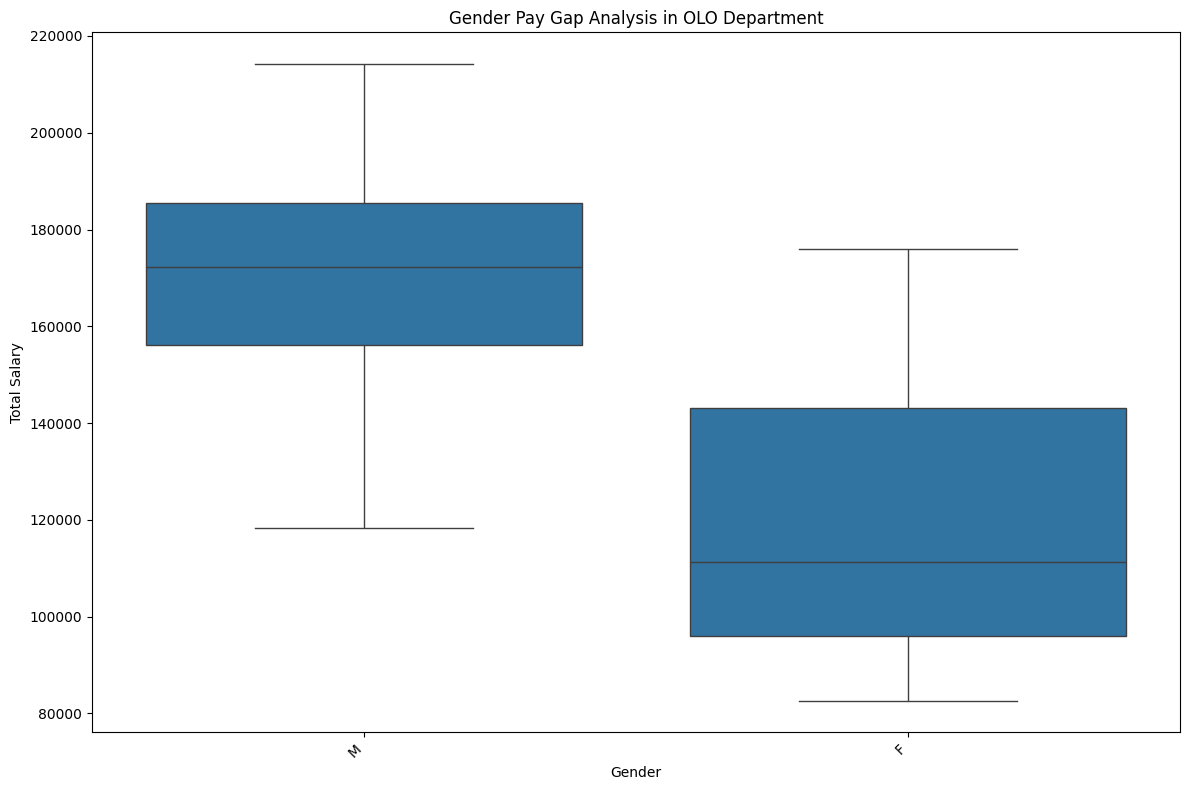

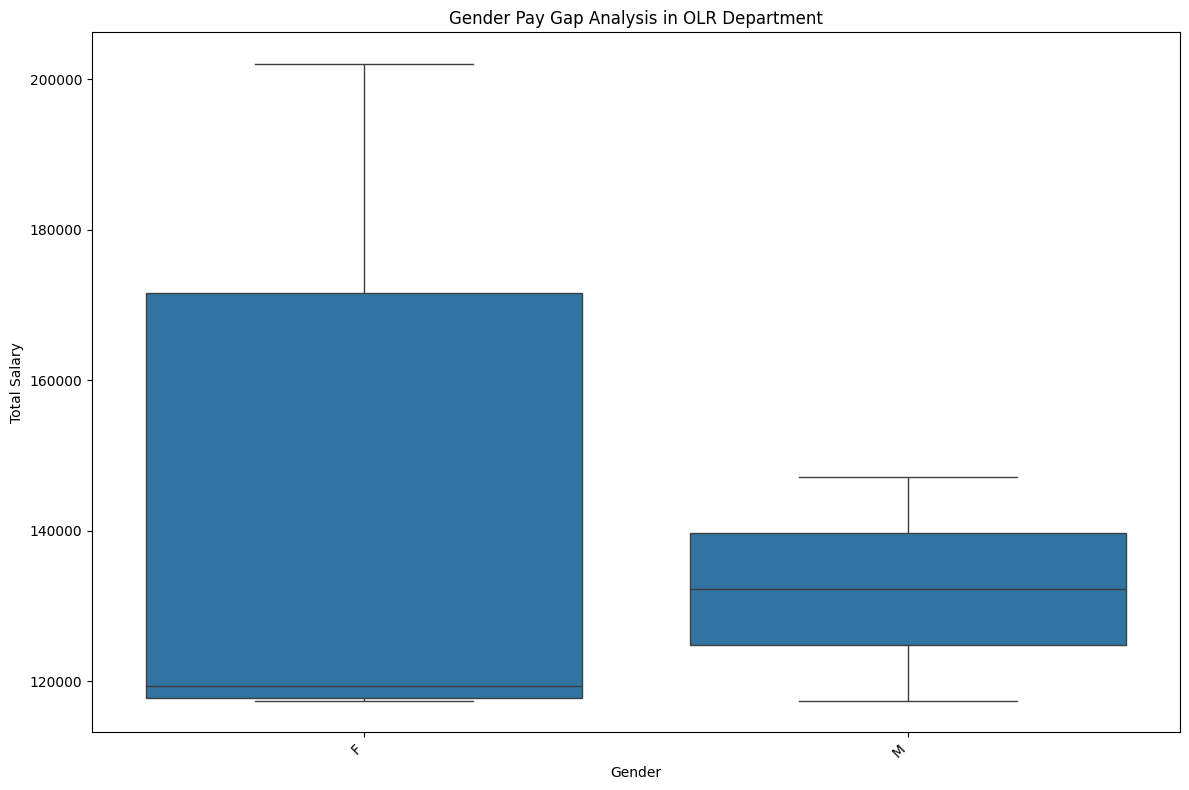

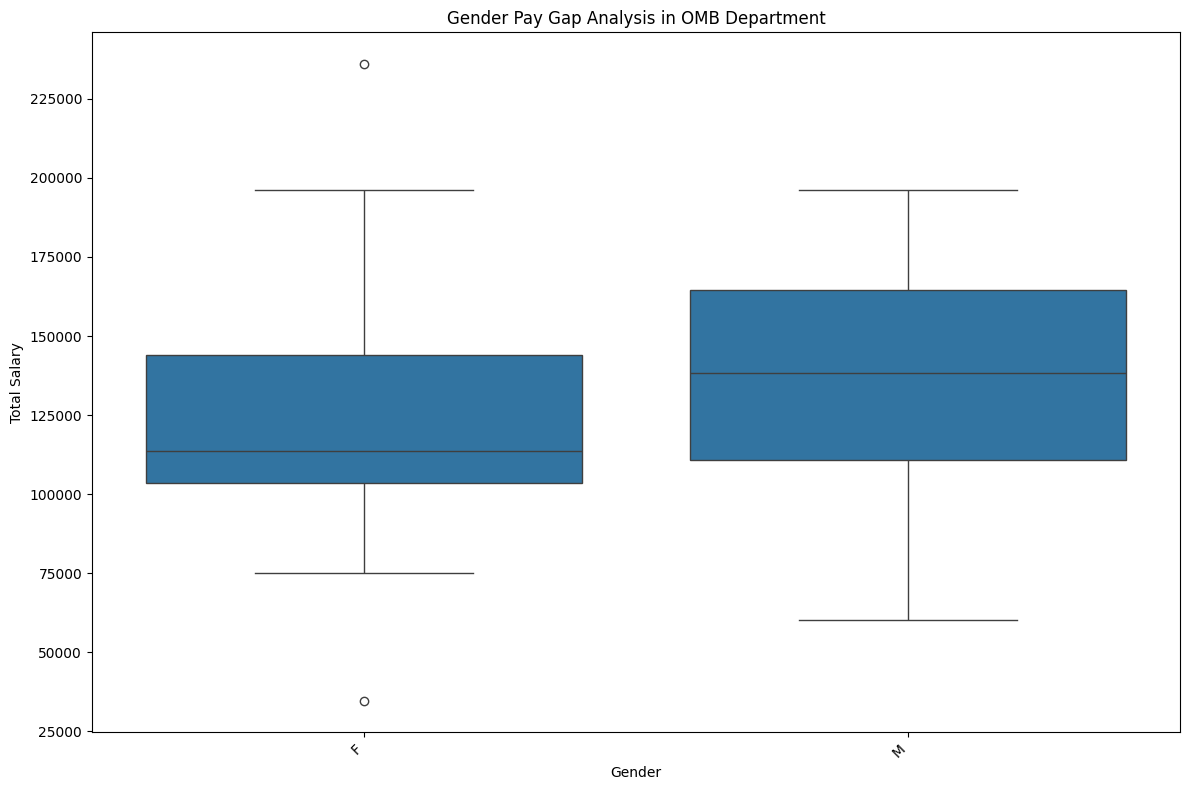

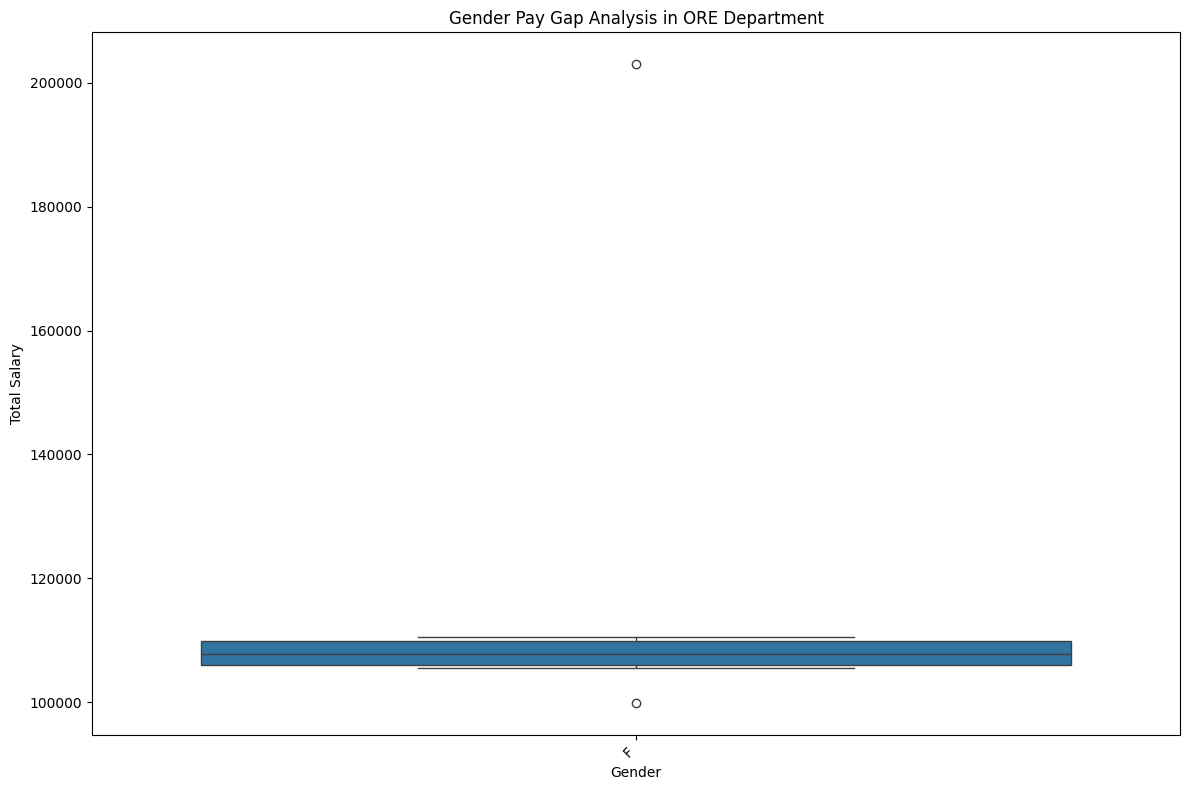

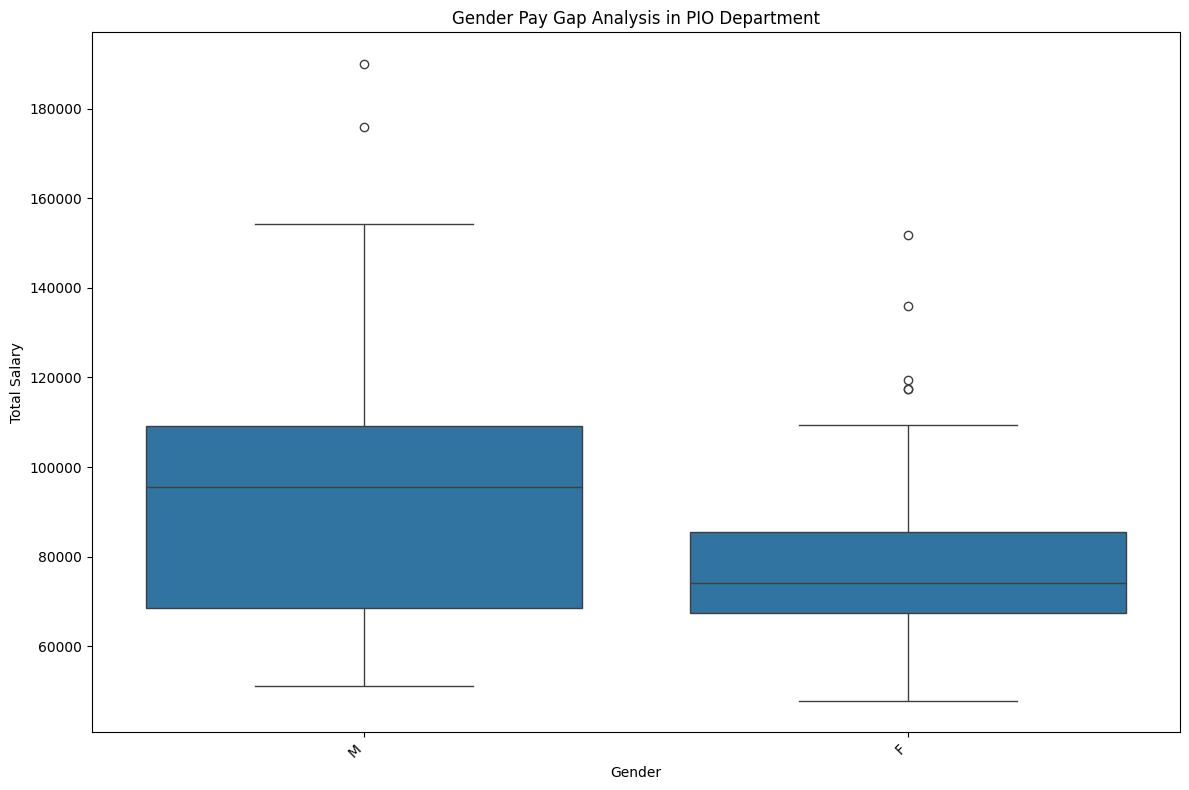

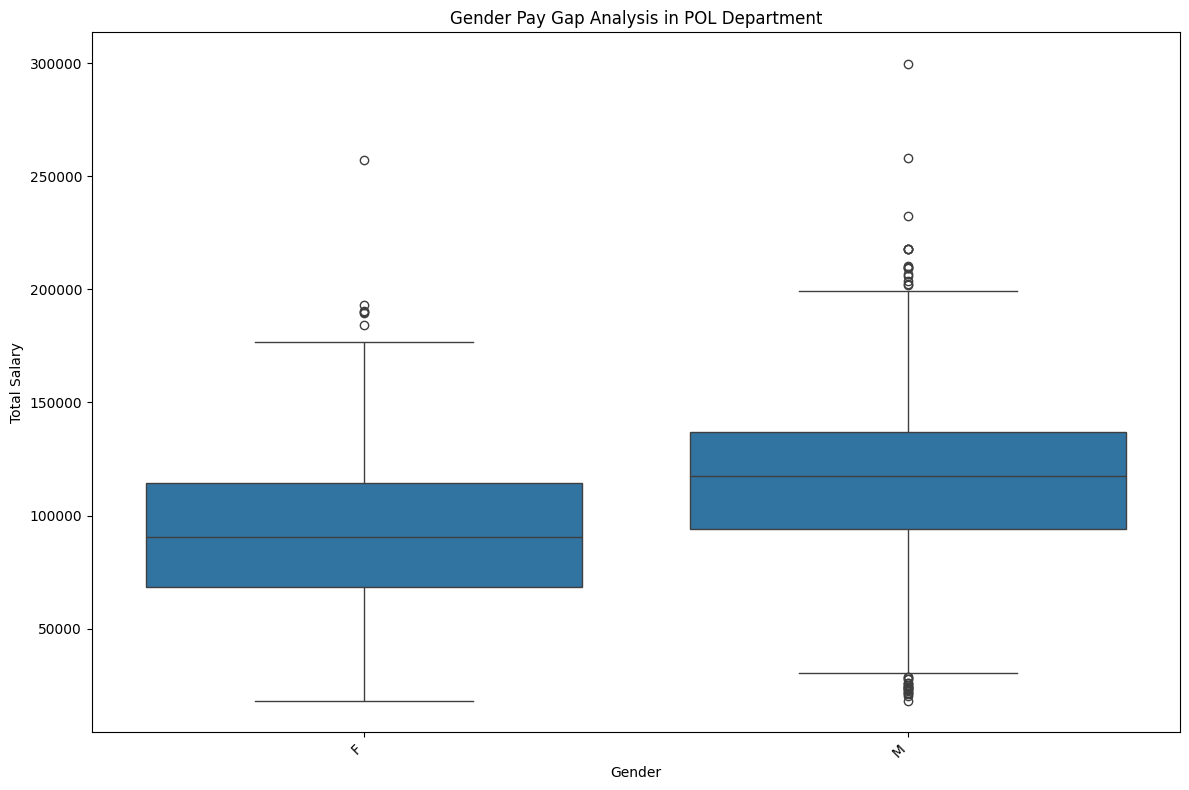

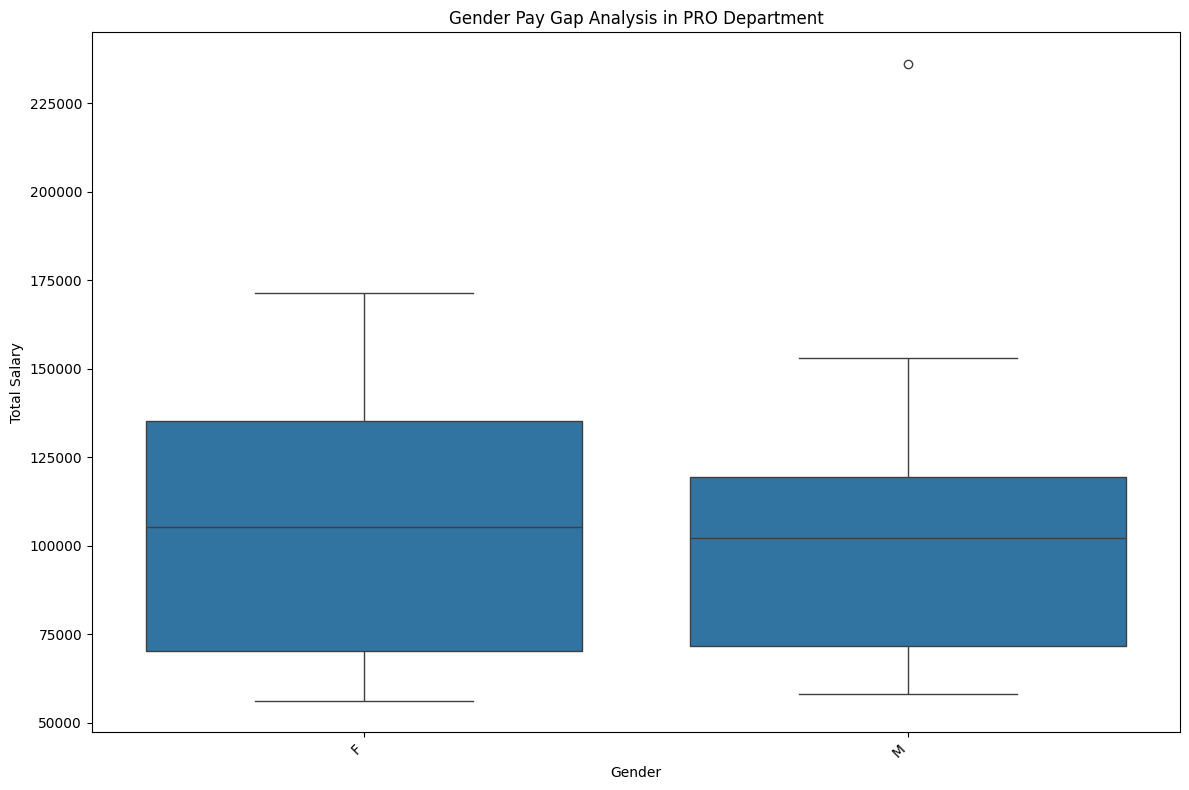

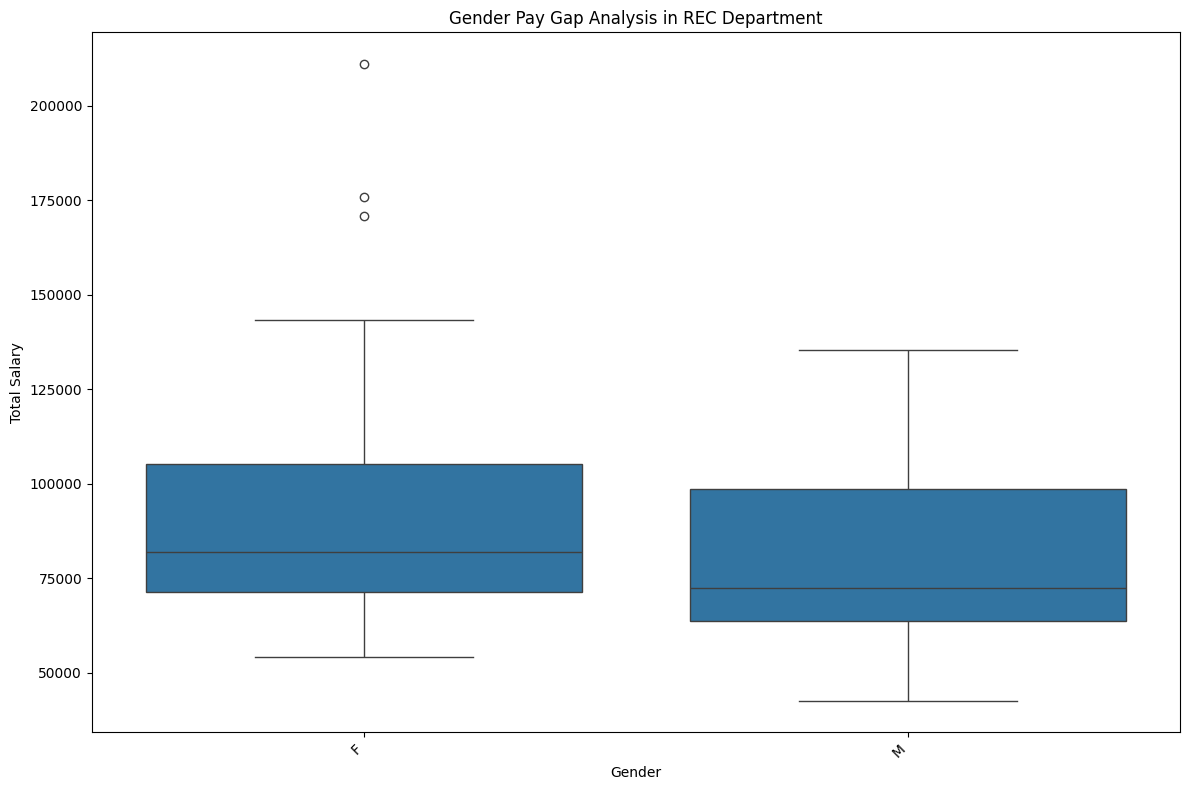

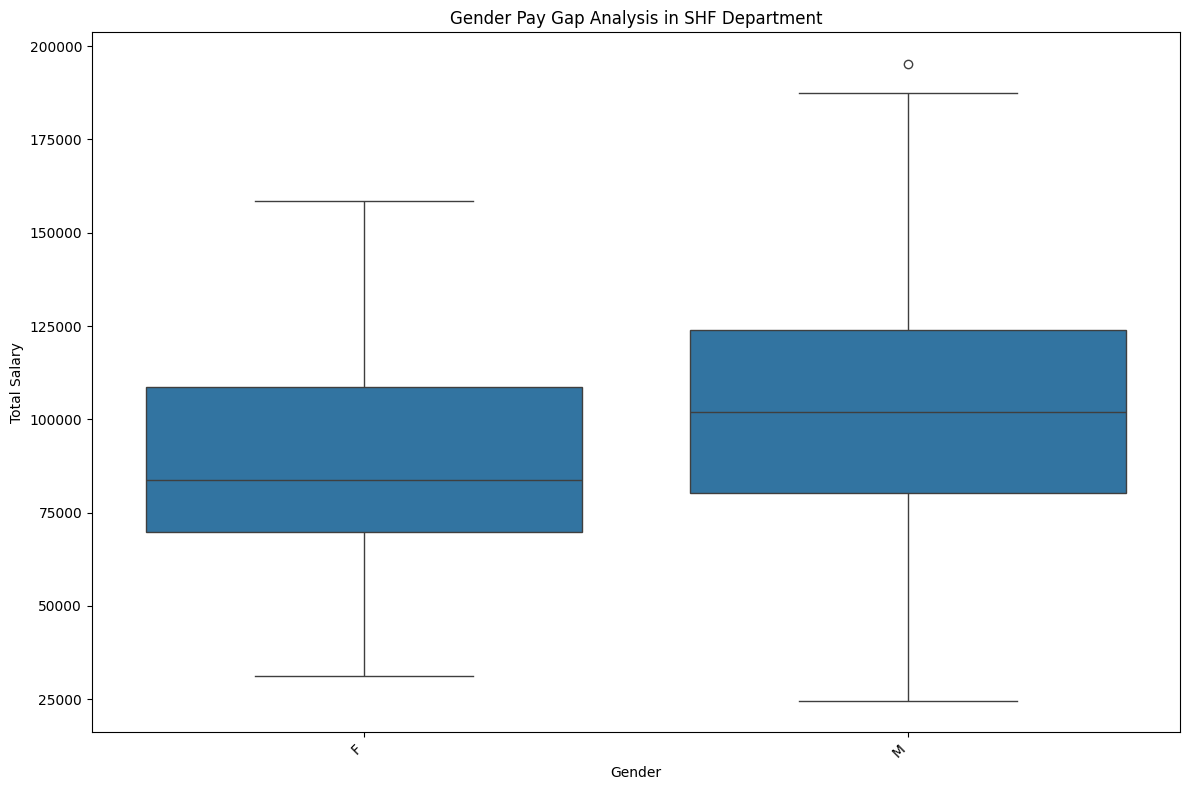

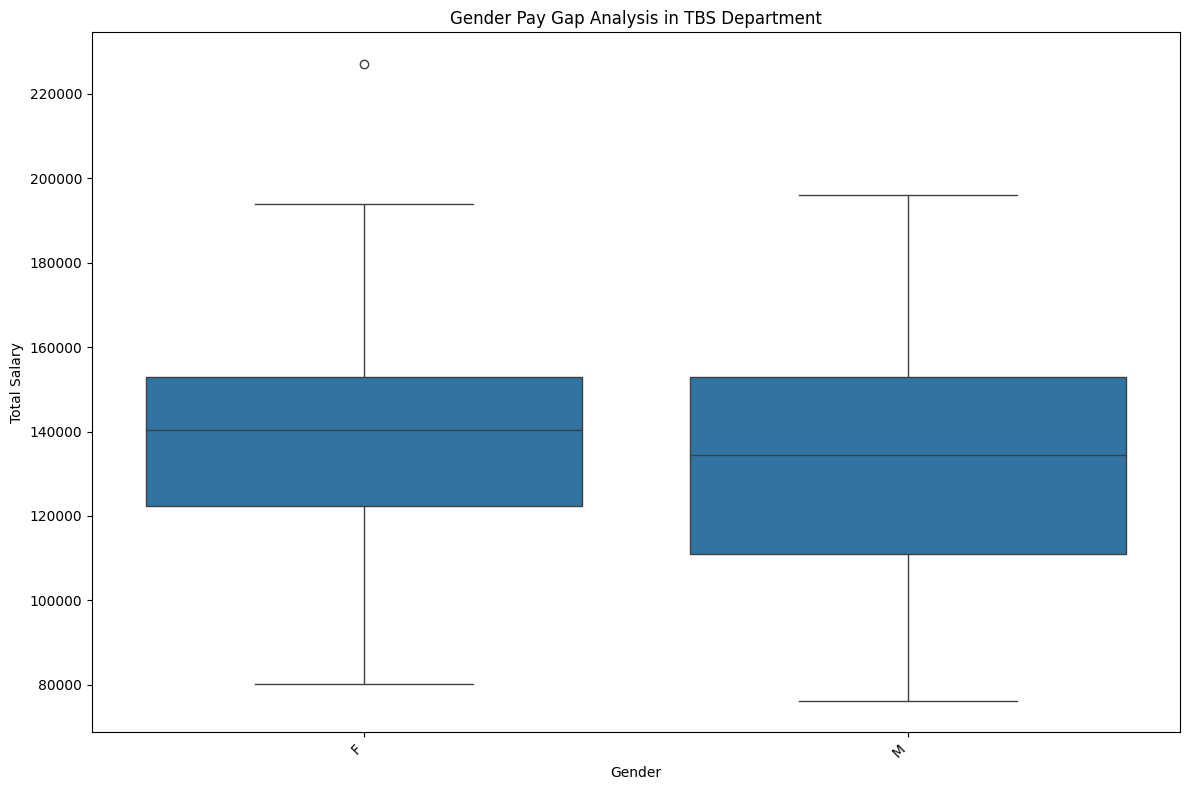

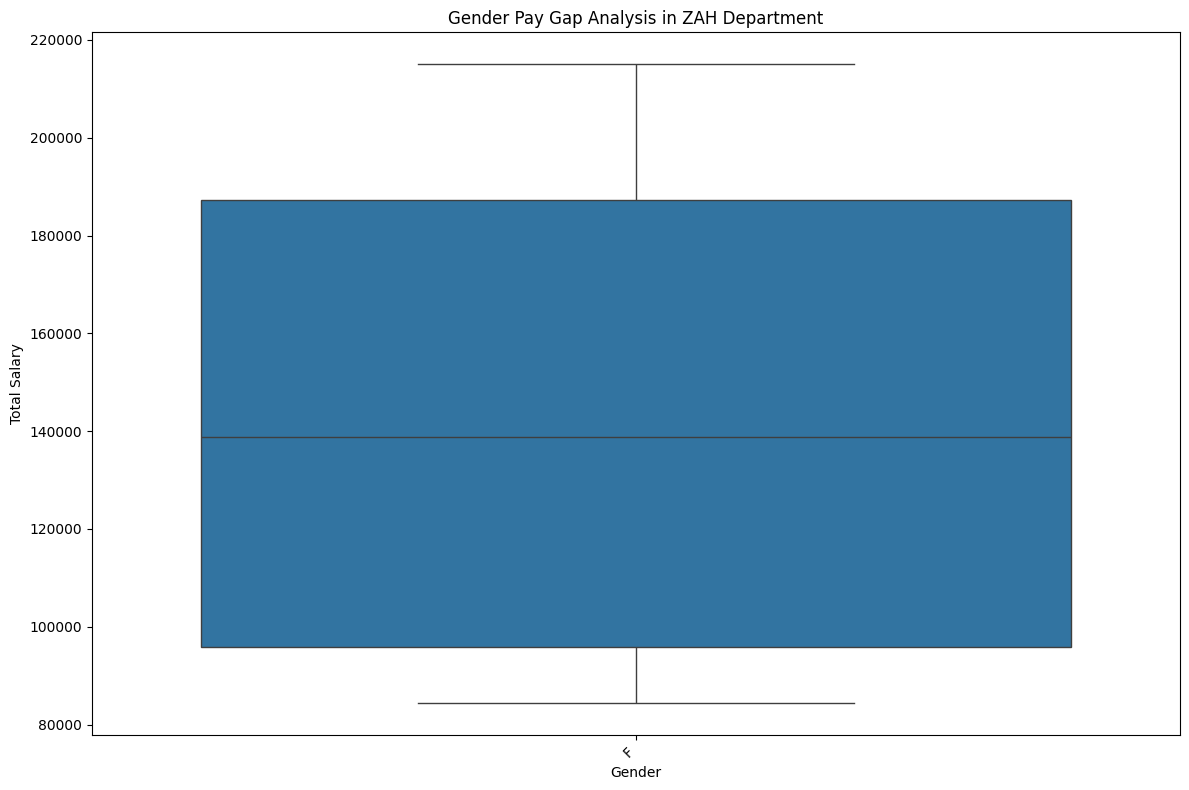

<Figure size 640x480 with 0 Axes>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Department', y='Total_Salary', hue='Gender', data=data)

# Customize plot
plt.title('Gender Pay Gap Analysis by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
# Create separate box plots for each department
departments = data['Department'].unique()

for dept in departments:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Gender', y='Total_Salary', data=data[data['Department'] == dept])
    plt.title(f'Gender Pay Gap Analysis in {dept} Department')
    plt.xlabel('Gender')
    plt.ylabel('Total Salary')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Show plot
plt.tight_layout()
plt.show()

Group data?

In [36]:
# Group data by Gender, Division, Grade, and Department
grouped_data = data.groupby(['Gender', 'Division', 'Grade', 'Department']).size().reset_index(name='Count')

# Display the grouped data
grouped_data.head()

,Gender,Division,Grade,Department,Count
0,F,ABS 85 Administration,M3,ABS,1
1,F,ABS 85 Administrative Services,16,ABS,2
2,F,ABS 85 Administrative Services,18,ABS,2
3,F,ABS 85 Administrative Services,21,ABS,4
4,F,ABS 85 Administrative Services,N26,ABS,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate by Gender
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=data[data['Gender'] == 'M'], x='Total_Salary', kde=True, hue='Department')
plt.title('Male Total Salary Distribution by Department')

plt.subplot(122)
sns.histplot(data=data[data['Gender'] == 'F'], x='Total_Salary', kde=True, hue='Department')
plt.title('Female Total Salary Distribution by Department')

plt.show()

# Color by Gender
plt.figure(figsize=(15, 7))
sns.histplot(data=data, x='Total_Salary', kde=True, hue='Gender', palette={'M': 'blue', 'F': 'pink'})
plt.title('Total Salary Distribution by Gender')
plt.show()

# Stacked Histograms
plt.figure(figsize=(15, 7))
sns.histplot(data=data, x='Total_Salary', hue='Gender', multiple="stack", palette={'M': 'blue', 'F': 'pink'})
plt.title('Stacked Histogram of Total Salary by Gender')
plt.show()

In [ ]:
# Calculate the mode for each column
mode_values = data.mode().iloc[0]

# Initialize a dictionary to store the count of mode occurrences
mode_counts = {}

# Iterate through each column and count the occurrences of the mode value
for column in data.columns:
    mode_counts[column] = data[column].value_counts().get(mode_values[column], 0)

print(mode_counts)

In [ ]:
unique_base_salaries = data['Base_Salary'].nunique()
print(unique_base_salaries)

In [ ]:
data.dtypes



### Standard Deviation Interpretation

#### Base_Salary
- **Standard Deviation (std)**: 30,463.74
- **Interpretation**: The base salaries in your dataset typically vary by about $30,463.74 from the mean salary of $90,530.12. This indicates a moderate level of dispersion around the mean. A higher standard deviation would indicate more variability in salaries, while a lower standard deviation would indicate that salaries are more closely clustered around the mean.

#### Overtime_Pay
- **Standard Deviation (std)**: 16,895.36
- **Interpretation**: The overtime pay in your dataset typically varies by about $16,895.36 from the mean overtime pay of $8,616.46. This high standard deviation suggests significant variability in overtime pay, with some employees receiving much higher or lower overtime pay than the average.

#### Longevity_Pay
- **Standard Deviation (std)**: 3,259.65
- **Interpretation**: The longevity pay in your dataset typically varies by about $3,259.65 from the mean longevity pay of $1,577.01. This indicates a high level of dispersion, with some employees receiving much higher or lower longevity pay than the average.

### Variation and Dispersion
- **Variation**: Standard deviation measures the extent to which the values in a dataset vary from the mean. A higher standard deviation indicates greater variation, while a lower standard deviation indicates less variation.
- **Dispersion**: Standard deviation quantifies the spread of the data points around the mean. It helps understand how spread out the values are in the dataset.

### Outliers
- **Outliers**: Data points that are significantly higher or lower than the rest of the data can increase the standard deviation. For example, the maximum values in your dataset (e.g., $292,000 for Base_Salary, $227,428.99 for Overtime_Pay, and $20,279.46 for Longevity_Pay) suggest the presence of outliers, which contribute to the high standard deviation.

### Summary
- **Base_Salary**: The standard deviation of $30,463.74 indicates moderate variability in salaries.
- **Overtime_Pay**: The standard deviation of $16,895.36 indicates significant variability in overtime pay.
- **Longevity_Pay**: The standard deviation of $3,259.65 indicates high variability in longevity pay.

The standard deviation provides valuable insights into the variability and dispersion of the data in each column. It helps identify the presence of outliers and understand how spread out the values are around the mean.

### Interpretation

- **Base_Salary**: The average base salary is approximately $90,530, with a standard deviation of $30,464. The salaries range from $18,257.50 to $292,000. The median salary is $87,328.
- **Overtime_Pay**: The average overtime pay is approximately $8,616, with a standard deviation of $16,895. The overtime pay ranges from $0 to $227,428.99. The median overtime pay is $526.71, indicating that many employees may not receive overtime pay.
- **Longevity_Pay**: The average longevity pay is approximately $1,577, with a standard deviation of $3,260. The longevity pay ranges from $0 to $20,279.46. The median longevity pay is $0, indicating that many employees may not receive longevity pay.

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns to check for outliers
plt.figure(figsize=(15, 5))

# Box plot for Base_Salary
plt.subplot(1, 3, 1)
plt.boxplot(data['Base_Salary'])
plt.title('Base Salary')

# Box plot for Overtime_Pay
plt.subplot(1, 3, 2)
plt.boxplot(data['Overtime_Pay'])
plt.title('Overtime Pay')

# Box plot for Longevity_Pay
plt.subplot(1, 3, 3)
plt.boxplot(data['Longevity_Pay'])
plt.title('Longevity Pay')

plt.tight_layout()
plt.show()

I will keep outliers.

In [ ]:
# # Calculate the percentage of outliers
# outlier_percentage = (total_outliers / len(data)) * 100

# # Check if the outliers are more than 30% of the data
# if outlier_percentage > 30:
#     print("Outliers are more than 30% of the data.")
# else:
#     print("Outliers are not more than 30% of the data.")

# print(f"Outlier percentage: {outlier_percentage:.2f}%")

In [ ]:
# Identify variables by their data types
cat = []
cont = []

for column in data.columns:
    if data[column].dtype == object or len(data[column].unique()) <= 7:
        cat.append(column)
    else:
        if column != 'z_score':
            cont.append(column)

# Display the categorization
print("Categorical Columns:")
print(cat)
print("\nContinuous Columns:")
print(cont)

In [ ]:
# Create a new DataFrame with continuous variables
continuous_df = data[cont]

# Display the new DataFrame
print(continuous_df)

Use z-score to remove outliers and keep some. 

In [ ]:
from scipy import stats

# Calculate z-scores for each continuous column
for col in continuous_df:
	data[f"{col}_zscore"] = stats.zscore(data[col])

threshold = 2

# Filter the data based on z-scores
filtered_data = data[(np.abs(data[[f"{col}_zscore" for col in continuous_df]]) <= threshold).all(axis=1)]

# Drop the z-score columns from the filtered data
filtered_data = filtered_data.drop(columns=[f"{col}_zscore" for col in continuous_df])

# Display the filtered data
filtered_data


In [ ]:
# Identify variables by their data types
cat = []
cont = []

for column in data.columns:
    if data[column].dtype == object or len(data[column].unique()) <= 7:
        cat.append(column)
    else:
        if column != 'z_score':
            cont.append(column)

# Display the categorization
print("Categorical Columns:")
print(cat)
print("\nContinuous Columns:")
print(cont)

In [ ]:
# Visualize the distribution of salaries for each gender within each subgroup (division, grade, department)
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Base_Salary', hue='Gender', data=data)
plt.title('Distribution of Base Salary by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Base Salary')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Overtime_Pay for each gender
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Overtime_Pay', hue='Gender', data=data)
plt.title('Distribution of Overtime Pay by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Overtime Pay')
plt.legend(title='Gender')
plt.show()

# Visualize the distribution of Longevity_Pay for each gender
plt.figure(figsize=(18, 10))
sn.boxplot(x='Gender', y='Longevity_Pay', hue='Gender', data=data)
plt.title('Distribution of Longevity Pay by Gender within Each Subgroup')
plt.xlabel('Gender')
plt.ylabel('Longevity Pay')
plt.legend(title='Gender')
plt.show()

In [40]:
data.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
Total_Salary       float64
Average            float64
dtype: object

In [43]:
data['Total_Salary'].mean()

100892.86425763904

In [48]:
data['Gender'].value_counts()

Gender
M    5687
F    3987
Name: count, dtype: int64

In [50]:
data['Grade'].value_counts()

Grade
T1     711
P4     676
16     583
F3     488
24     458
      ... 
N38      1
N33      1
N36      1
MD2      1
N35      1
Name: count, Length: 98, dtype: int64

2. Analyse the distribution of salaries across different ‘Departments’ and ‘Divisions’ to understand
how compensation varies within the organisation. [10 Marks]

In [52]:
# Summary statistics
print(data.describe())

         Base_Salary   Overtime_Pay  Longevity_Pay   Total_Salary  \
count    9674.000000    9674.000000    9674.000000    9674.000000   
mean    90725.643578    8594.192753    1573.027926  100892.864258   
std     30774.245561   16879.186881    3256.385047   37465.460941   
min     11147.240000       0.000000       0.000000   11147.240000   
25%     71147.363700       0.000000       0.000000   76624.287500   
50%     87328.000000     518.325000       0.000000   97161.310000   
75%    108084.000000   10237.242500    1334.992500  120333.000000   
max    292000.000000  227428.990000   20279.460000  370240.930000   

             Average  
count    9674.000000  
mean    33630.954753  
std     12488.486980  
min      3715.746667  
25%     25541.429167  
50%     32387.103333  
75%     40111.000000  
max    123413.643333  


In [75]:
# Group data by Department and Division
gr_data = data.groupby('Department')[['Base_Salary', 'Longevity_Pay', 'Overtime_Pay', 'Total_Salary']].describe()

# Display the grouped data
#print(gr_data.head())
gr_data

Base_Salary                                            \
                 count           mean           std          min   
Department                                                         
ABS              459.0   64722.536091  29626.276916   19252.5000   
BOA                3.0  104482.526933  42371.078284   74404.5808   
BOE               34.0   85517.136856  27670.574186   50438.0000   
CAT               74.0  130264.998488  39325.918962   25210.5000   
CCL              117.0  101172.051873  39903.645924   32842.0000   
CEC              103.0   75934.315712  31294.977033   31500.4700   
CEX               47.0  128811.643806  56698.650652   22525.7844   
COR              513.0   84960.180202  23826.077525   46862.7300   
CUS               28.0   93023.134818  33355.455517   22639.0000   
DEP              178.0  104563.721137  26560.620956   25210.5000   
DGS              390.0   91661.476491  27383.558173   44862.3785   
DHS               19.0  113653.769468  29100.547640   66303.5100   
DOT             1274.0   81622.493072  21475.038144   23932.0995   
DPS              228.0  103980.580748  26971.402721   49329.4028   
ECM                2.0  141388.425000  48113.560646  107367.0000   
FIN              112.0  114253.147319  33298.241768   61670.2249   
FRS             1361.0   98188.564701  24457.811744   39444.0000   
HCA               95.0  102979.771177  28000.738563   58718.6033   
HHS             1600.0   88806.986988  26591.906687   25210.5000   
HRC               11.0  108182.204118  35384.626093   78943.0244   
IGR                4.0  165196.750000  60117.264915   98228.0000   
LIB              421.0   64620.236973  33237.214862   19255.0000   
MPB                2.0   92906.846950  55151.363397   53908.9439   
NDA               18.0  135776.816339  42988.571252   72000.0000   
OAG               11.0  100612.172064  44077.364495   11147.2400   
OAS               77.0   76513.615360  24377.618703   49545.9400   
OCP               18.0  106213.422522  35576.230621   53001.9849   
OFR                3.0  112777.666667  27781.365991   92000.0000   
OGM                5.0  104599.236000  27903.324775   87000.0000   
OHR               63.0  109212.501744  30621.413844   58822.1550   
OIG               19.0  126224.102832  31572.542463   79367.9400   
OLO               15.0  133615.982687  37967.301320   82656.6250   
OLR                7.0  141485.288571  33944.347434  117424.0000   
OMB               40.0  127234.698698  38856.271622   34684.2042   
ORE                6.0  122101.773167  39850.177231   98228.0000   
PIO               65.0   87183.621523  29961.796206   47833.0000   
POL             1702.0   93917.510172  30409.893839   18257.5000   
PRO               34.0  105796.360556  40311.100240   56333.0000   
REC              184.0   84345.027278  23967.534926   42577.0000   
SHF              184.0   90298.364421  25574.000923   24651.3235   
TBS              144.0  132176.573612  28617.925427   76292.0339   
ZAH                4.0  143900.490725  62852.346888   84365.5529   

                                                                   \
                      25%           50%            75%        max   
Department                                                          
ABS          46468.628150   61240.00000   77548.906050  236000.00   
BOA          80253.790400   86103.00000  119521.500000  152940.00   
BOE          64693.000000   78947.00000   98228.000000  176948.00   
CAT         104640.520900  137830.26175  158802.000000  258000.00   
CCL          74333.000000   86103.00000  124333.000000  246162.47   
CEC          57036.208350   65083.50000   87305.220000  197000.00   
CEX          88051.500000  109575.94000  175334.800000  292000.00   
COR          67582.000000   84577.09500   97488.398800  221000.00   
CUS          70343.000000   86103.00000  100696.237675  196059.00   
DEP          89424.500000  102682.00000  117424.000000  225000.00   
DGS          76099.994575   89948.00000  102682.00000

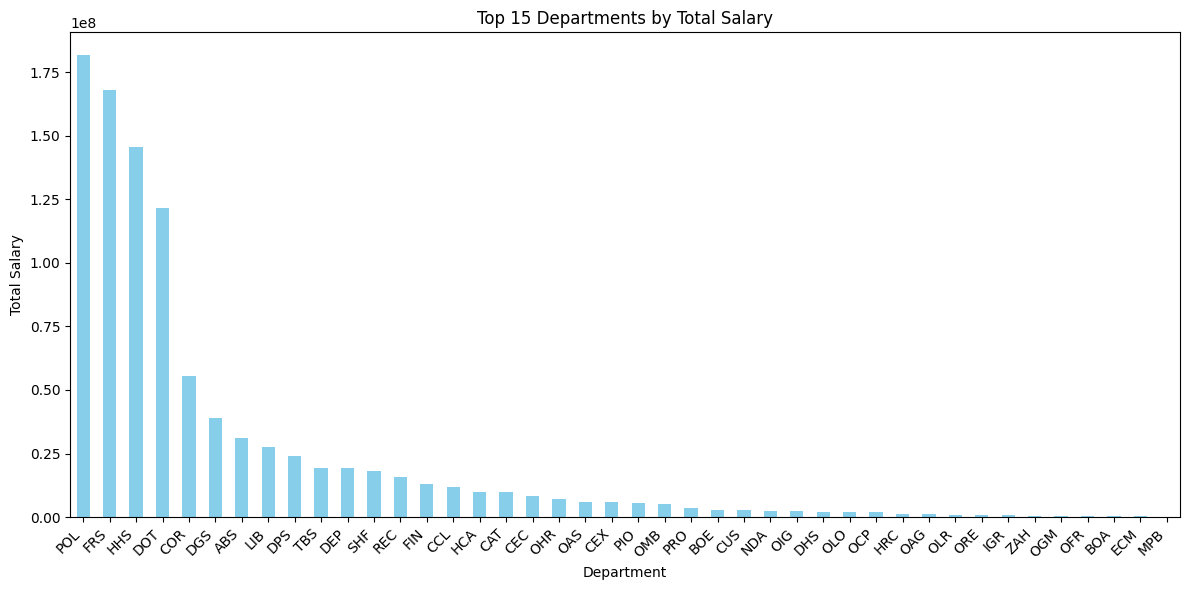

In [87]:
# # Grouping and sorting by the number of entries per job title
# dept_counts = data['Department'].value_counts().sort_values(ascending=False)

# # Creating the bar chart
# plt.figure(figsize=(12, 6))
# dept_counts[:15].plot(kind='bar', color='skyblue')
# plt.title('Top 10 Departement by Total Entries')
# plt.xlabel('Departement')
# plt.ylabel('Total Entries')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Ensures the labels fit within the figure
# plt.show()
# Grouping and sorting by the highest total salary per department
highest_salary_depts = data.groupby('Department')['Total_Salary'].sum().sort_values(ascending=False).head(50)

# Creating the bar chart
plt.figure(figsize=(12, 6))
highest_salary_depts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Departments by Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

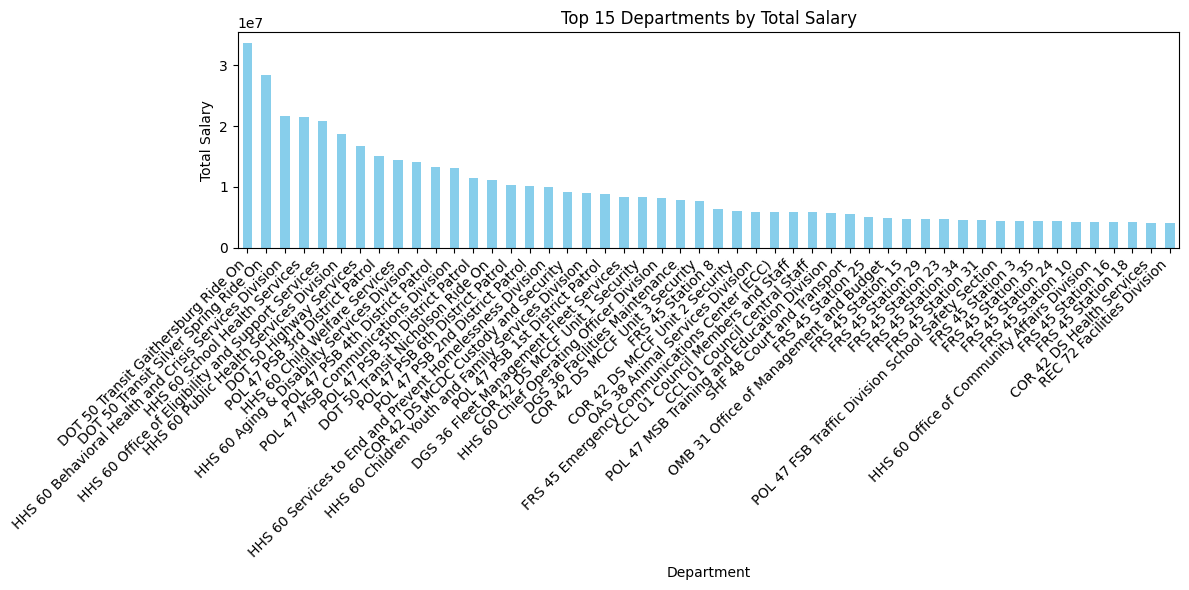

In [91]:
highest_salary_div = data.groupby('Division')['Total_Salary'].sum().sort_values(ascending=False).head(50)

# Creating the bar chart
plt.figure(figsize=(12, 6))
highest_salary_div.plot(kind='bar', color='skyblue')
plt.title('Top 15 Departments by Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

Identify the impact of ‘Overtime’ and ‘Longevity Pay’ on the overall compensation of employees
(i.e. ‘Base_Salary’) and explain the trends or patterns in these payments.

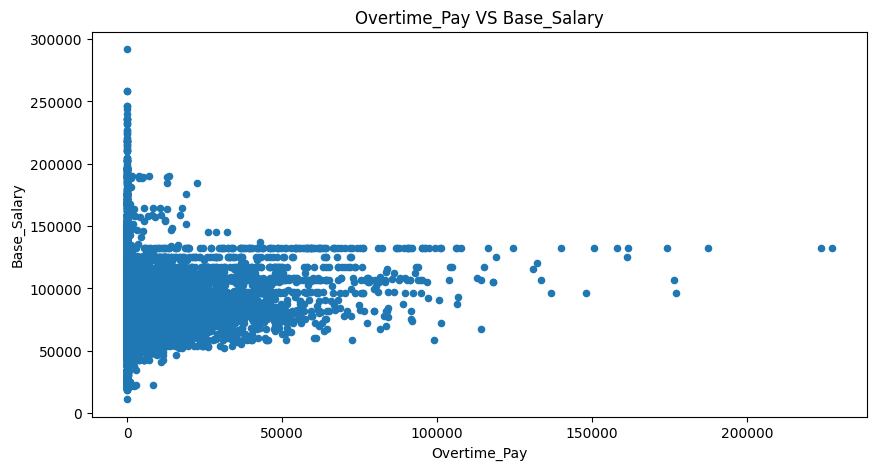

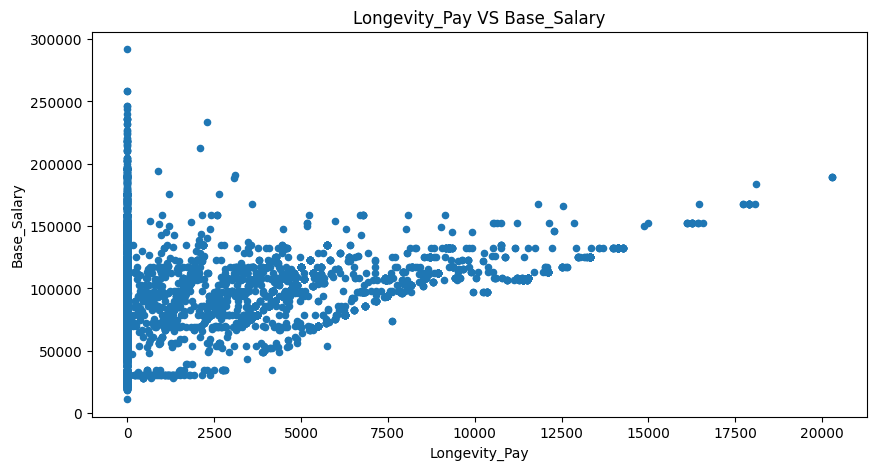

In [92]:
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='Base_Salary', figsize=(10,5), title=predictor+" VS "+ 'Base_Salary')

So best to run a statistical relationship using correlation.

In [114]:
ContinuousCols = ['Overtime_Pay', 'Longevity_Pay','Base_Salary']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,Overtime_Pay,Longevity_Pay,Base_Salary
Overtime_Pay,1.000000,0.228843,0.073841
Longevity_Pay,0.228843,1.000000,0.295502
Base_Salary,0.073841,0.295502,1.000000


<Axes: >

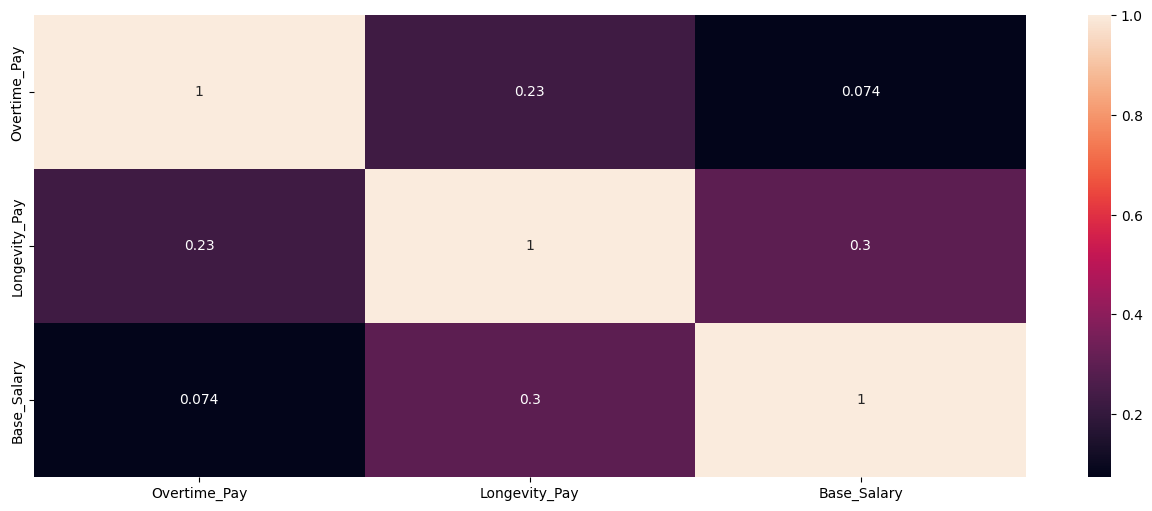

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the continuous columns
corr_matrix = data[['Overtime_Pay', 'Longevity_Pay', 'Base_Salary']].corr()

# Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True)

There is low correlation
r = 0.0-0.3 is low correlation


These scatter plots show the relationship between Base Salary and two other types of pay: Overtime Pay and Longevity Pay. Let's analyze each plot:

**Overtime Pay vs Base Salary**

*   **No Clear Pattern:** The points are scattered randomly, indicating no strong relationship between overtime pay and base salary. This suggests that employees with higher base salaries don't necessarily receive more overtime pay, and vice versa.
*   **Potential Cap:** There seems to be an upper limit on overtime pay, as the points cluster towards the higher end of the x-axis. This might indicate a policy or practical limit on how much overtime an employee can earn.
*   **Concentration at Lower Levels:** Many points are at lower levels of both overtime pay and base salary, suggesting a large proportion of employees receive minimal overtime and have lower base salaries.

**Longevity Pay vs Base Salary**

*   **Weak Positive Trend:** A slight upward trend can be observed, suggesting a weak positive relationship between longevity pay and base salary. This implies that employees with longer tenure (and thus potentially higher base salaries) tend to receive slightly more longevity pay.
*   **Distinct Bands:** Horizontal bands of points are visible, possibly indicating different tiers or levels of longevity pay based on years of service.
*   **Outliers:** Some outliers exist, particularly at higher base salaries, indicating that certain employees receive significantly more longevity pay than others with similar base salaries. This could be due to factors like exceptional performance or specific roles.

**Overall Insights**

*   **Compensation Structure:** These plots provide insights into the company's compensation structure, highlighting the roles of overtime and longevity pay in relation to base salary.
*   **Potential Inequities:** The lack of a strong pattern in the first plot and the weak pattern in the second might warrant further investigation into potential pay disparities. Are certain departments or roles receiving disproportionate amounts of overtime or longevity pay?
*   **Policy Implications:** The plots could inform policy decisions regarding overtime limits, longevity pay structures, and overall compensation fairness.